In [16]:
import numpy as np
import scipy as sp
import new_correction as nc
import matplotlib.pyplot as plt
import os

In [17]:
path = '/datadisk/MIME/exp/expData/'
protein_concentrations = [8,40,200,1000]
c = 1
lambda_l1 = 0.1
correction_method = 'none'
usable_pools = ['8_40', '8_200', '8_1000', '40_40', '40_200', '40_1000', '1000_40', '1000_200', '1000_1000']

In [18]:
logK_sequences_r2, logK_mutations_r2, interactions_r2, significant_positions = nc.logK_inference_exp(path, protein_concentrations, c, usable_pools, lambda_l1, correction_method)

Pool 8, 40:
	Pruned 71463.0 of 1141023.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 55944.0
	 number of inferred interactions: 17548
Pool 8, 200:
	Pruned 74298.0 of 1240096.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 55944.0
	 number of inferred interactions: 18055
Pool 8, 1000:
	Pruned 67324.0 of 1040909.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 55944.0
	 number of inferred interactions: 15548
Pool 40, 40:
	Pruned 85933.0 of 1226030.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 55944.0
	 number of inferred interactions: 18968
Pool 40, 200:
	Pruned 80471.0 of 1201744.0 sequences
	STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
	 number of possible interactions: 55944.0
	 number of inferred interactions: 18856
Pool 40, 1000:
	Pruned 82188.0 of 1158983.0 seque

In [19]:
# savepath = f'/datadisk/MIME/exp/expData/Inference_c_{c}_lambda_{lambda_l1}_{correction_method}/'
# # make directory if it doesn't exist
# import os
# os.makedirs(savepath, exist_ok=True)
# i = 0
# for protein_concentration1 in protein_concentrations:
#     for protein_concentration2 in protein_concentrations:
#         if f'{protein_concentration1}_{protein_concentration2}' not in usable_pools:
#                 continue
#         # save the logK_sequences_r2
#         np.savez(f'{savepath}logK_sequences_r2_{protein_concentration1}_{protein_concentration2}.npz', logK_sequences_r2=logK_sequences_r2[i])
#         # save the logK_mutations_r2
#         np.savez(f'{savepath}logK_mutations_r2_{protein_concentration1}_{protein_concentration2}.npz', logK_mutations_r2=logK_mutations_r2[i])
#         # save the interactions_r2
#         np.savez(f'{savepath}interactions_r2_{protein_concentration1}_{protein_concentration2}.npz', interactions_r2=interactions_r2[i])
#         i += 1

In [20]:
savepath = f'/datadisk/MIME/exp/expData/Inference_c_{c}_lambda_{lambda_l1}_{correction_method}/'
logK_sequences_r2 = []
logK_mutations_r2 = []
interactions_r2 = []
for protein_concentration1 in protein_concentrations:
    for protein_concentration2 in protein_concentrations:
        if f'{protein_concentration1}_{protein_concentration2}' not in usable_pools:
                continue
        # load the logK_sequences_r2
        logK_sequences_r2.append(np.load(f'{savepath}logK_sequences_{protein_concentration1}_{protein_concentration2}.npz')['logK_sequences'])
        # load the logK_mutations_r2
        logK_mutations_r2.append(np.load(f'{savepath}logK_mutations_{protein_concentration1}_{protein_concentration2}.npz')['logK_mutations'])
        # load the interactions_r2
        interactions_r2.append(np.load(f'{savepath}interactions_{protein_concentration1}_{protein_concentration2}.npz')['interactions'])

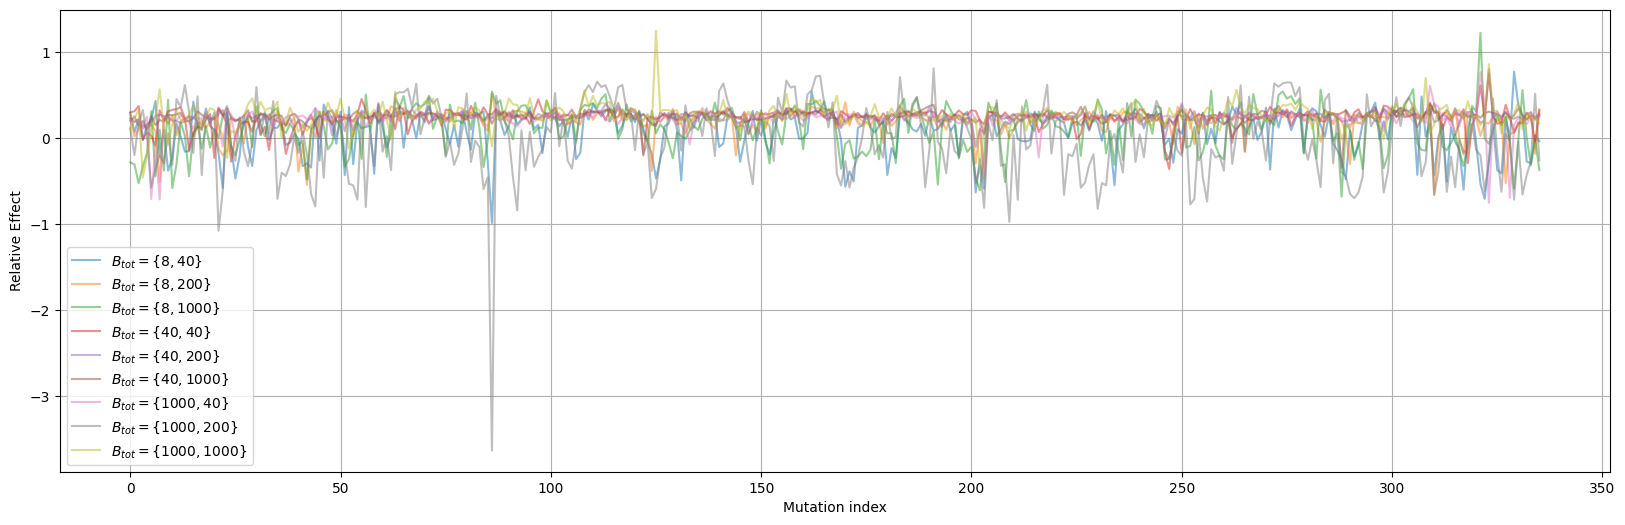

In [21]:
# line plot per pool the logK values
plt.figure(figsize=(20, 6))
for i in range(len(usable_pools)):
    plt.plot(logK_mutations_r2[i], alpha=0.5)

# add ticks where logK_mutations_r2 = nan
for i in range(len(usable_pools)):
    #plot an x at positions where logK_mutations_r2 = nan
    plt.scatter(np.where(np.isnan(logK_mutations_r2[i]))[0], np.zeros(len(np.where(np.isnan(logK_mutations_r2[i]))[0])), marker='x', color='red', alpha=0.5, s=10)
# plt.title('LogK values per pool')
plt.xlabel('Mutation index')
plt.ylabel('Relative Effect')
legend = []
for pool in usable_pools:
    legend.append('$B_{tot} = \{'+ pool.replace('_',', ')+'\}$')
plt.legend(legend)
plt.grid()
plt.show()

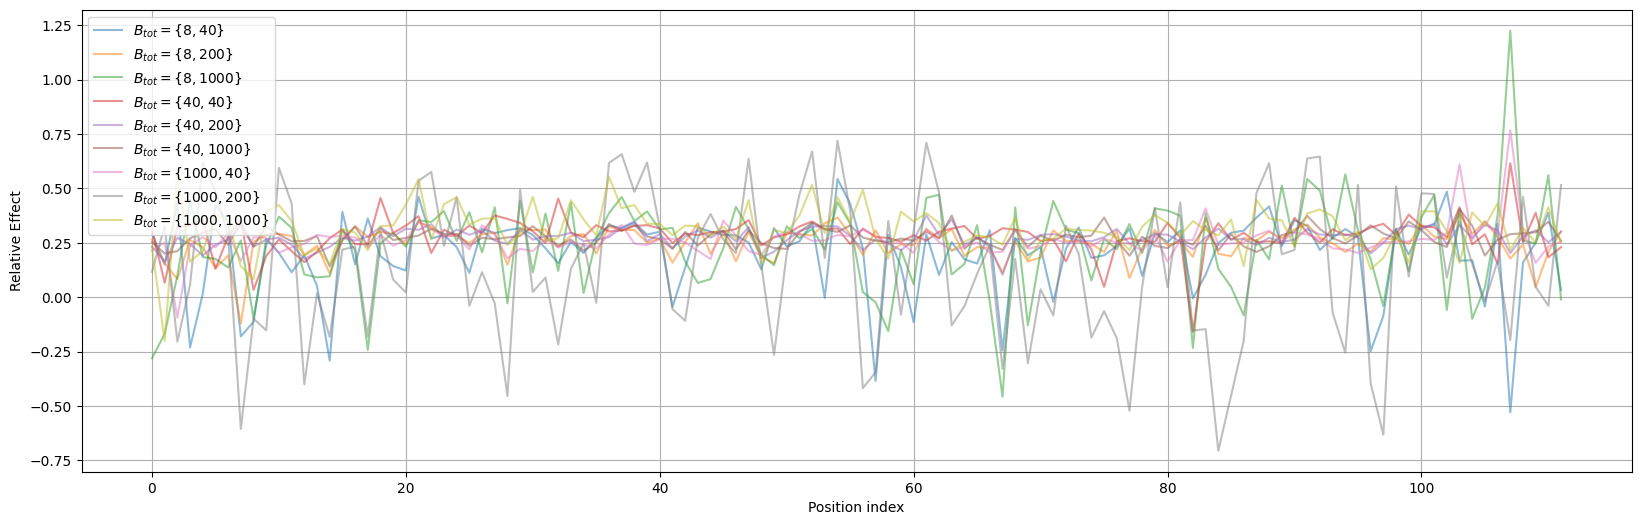

In [22]:
# 3 indices are always mutations of one position
# take only the maximum logK value for each position
# plot the logK values for each position
plt.figure(figsize=(20, 6))
for i,pool in enumerate(logK_mutations_r2):

    logK_muts = pool
    logK_pos = np.zeros(int(logK_muts.shape[0]/3))
    for i in range(len(logK_pos)):
        logK_pos[i] = np.max(logK_muts[i*3:i*3+2])

    # print(logK_pos.shape)
    plt.plot(logK_pos, label=f'Pool {i+1}', alpha=0.5)
# add ticks where logK_pos = nan
for i in range(len(logK_pos)):
    if np.isnan(logK_pos[i]):
        #plot an x at positions where logK_pos = nan
        plt.scatter(i, 0, marker='x', color='red', alpha=0.5, s=10)

# plt.title('LogK values per position')
plt.xlabel('Position index')
plt.ylabel('Relative Effect')
plt.legend(legend)
plt.grid()
plt.show()


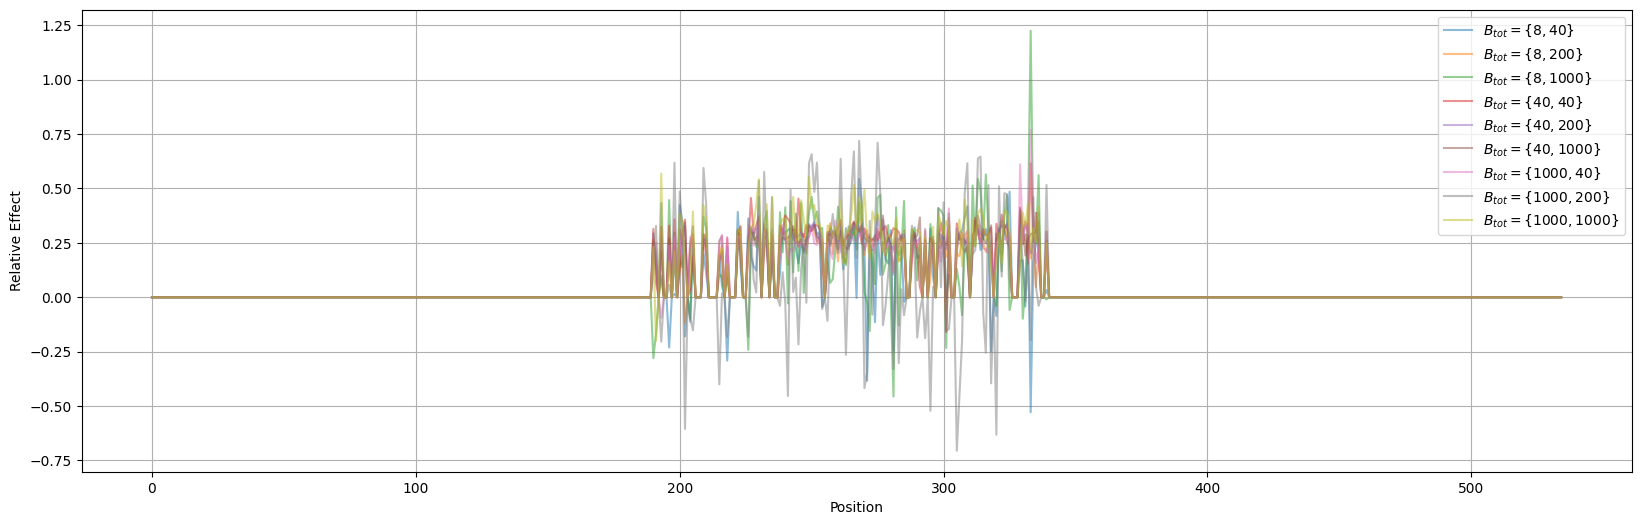

In [23]:
significant_positions = np.loadtxt('/datadisk/MIME/exp/expData/sig_pos2.txt')

# same plot but add the non significant positions with 0
plt.figure(figsize=(20, 6))
for i,pool in enumerate(logK_mutations_r2):
    logK_muts = pool
    logK_pos = np.zeros(int(logK_muts.shape[0]/3))
    for i in range(len(logK_pos)):
        logK_pos[i] = np.max(logK_muts[i*3:i*3+2])

    full_seq = np.zeros(535)
    # insert the logK_pos values in the full_seq at the significant positions
    k = 0
    for j in range(len(full_seq)):
        if j in significant_positions:
            full_seq[j] = logK_pos[k]
            k += 1
        else:
            full_seq[j] = 0
    # print(logK_pos.shape)
    plt.plot(full_seq, label=f'Pool {i+1}', alpha=0.5)
# add ticks where logK_pos = nan
for i in range(len(full_seq)):
    if np.isnan(full_seq[i]):
        #plot an x at positions where logK_pos = nan
        plt.scatter(i, 0, marker='x', color='red', alpha=0.5, s=10)
# plt.title('LogK values per position')
plt.xlabel('Position')
plt.ylabel('Relative Effect')

plt.legend(legend)
plt.grid()
plt.show()


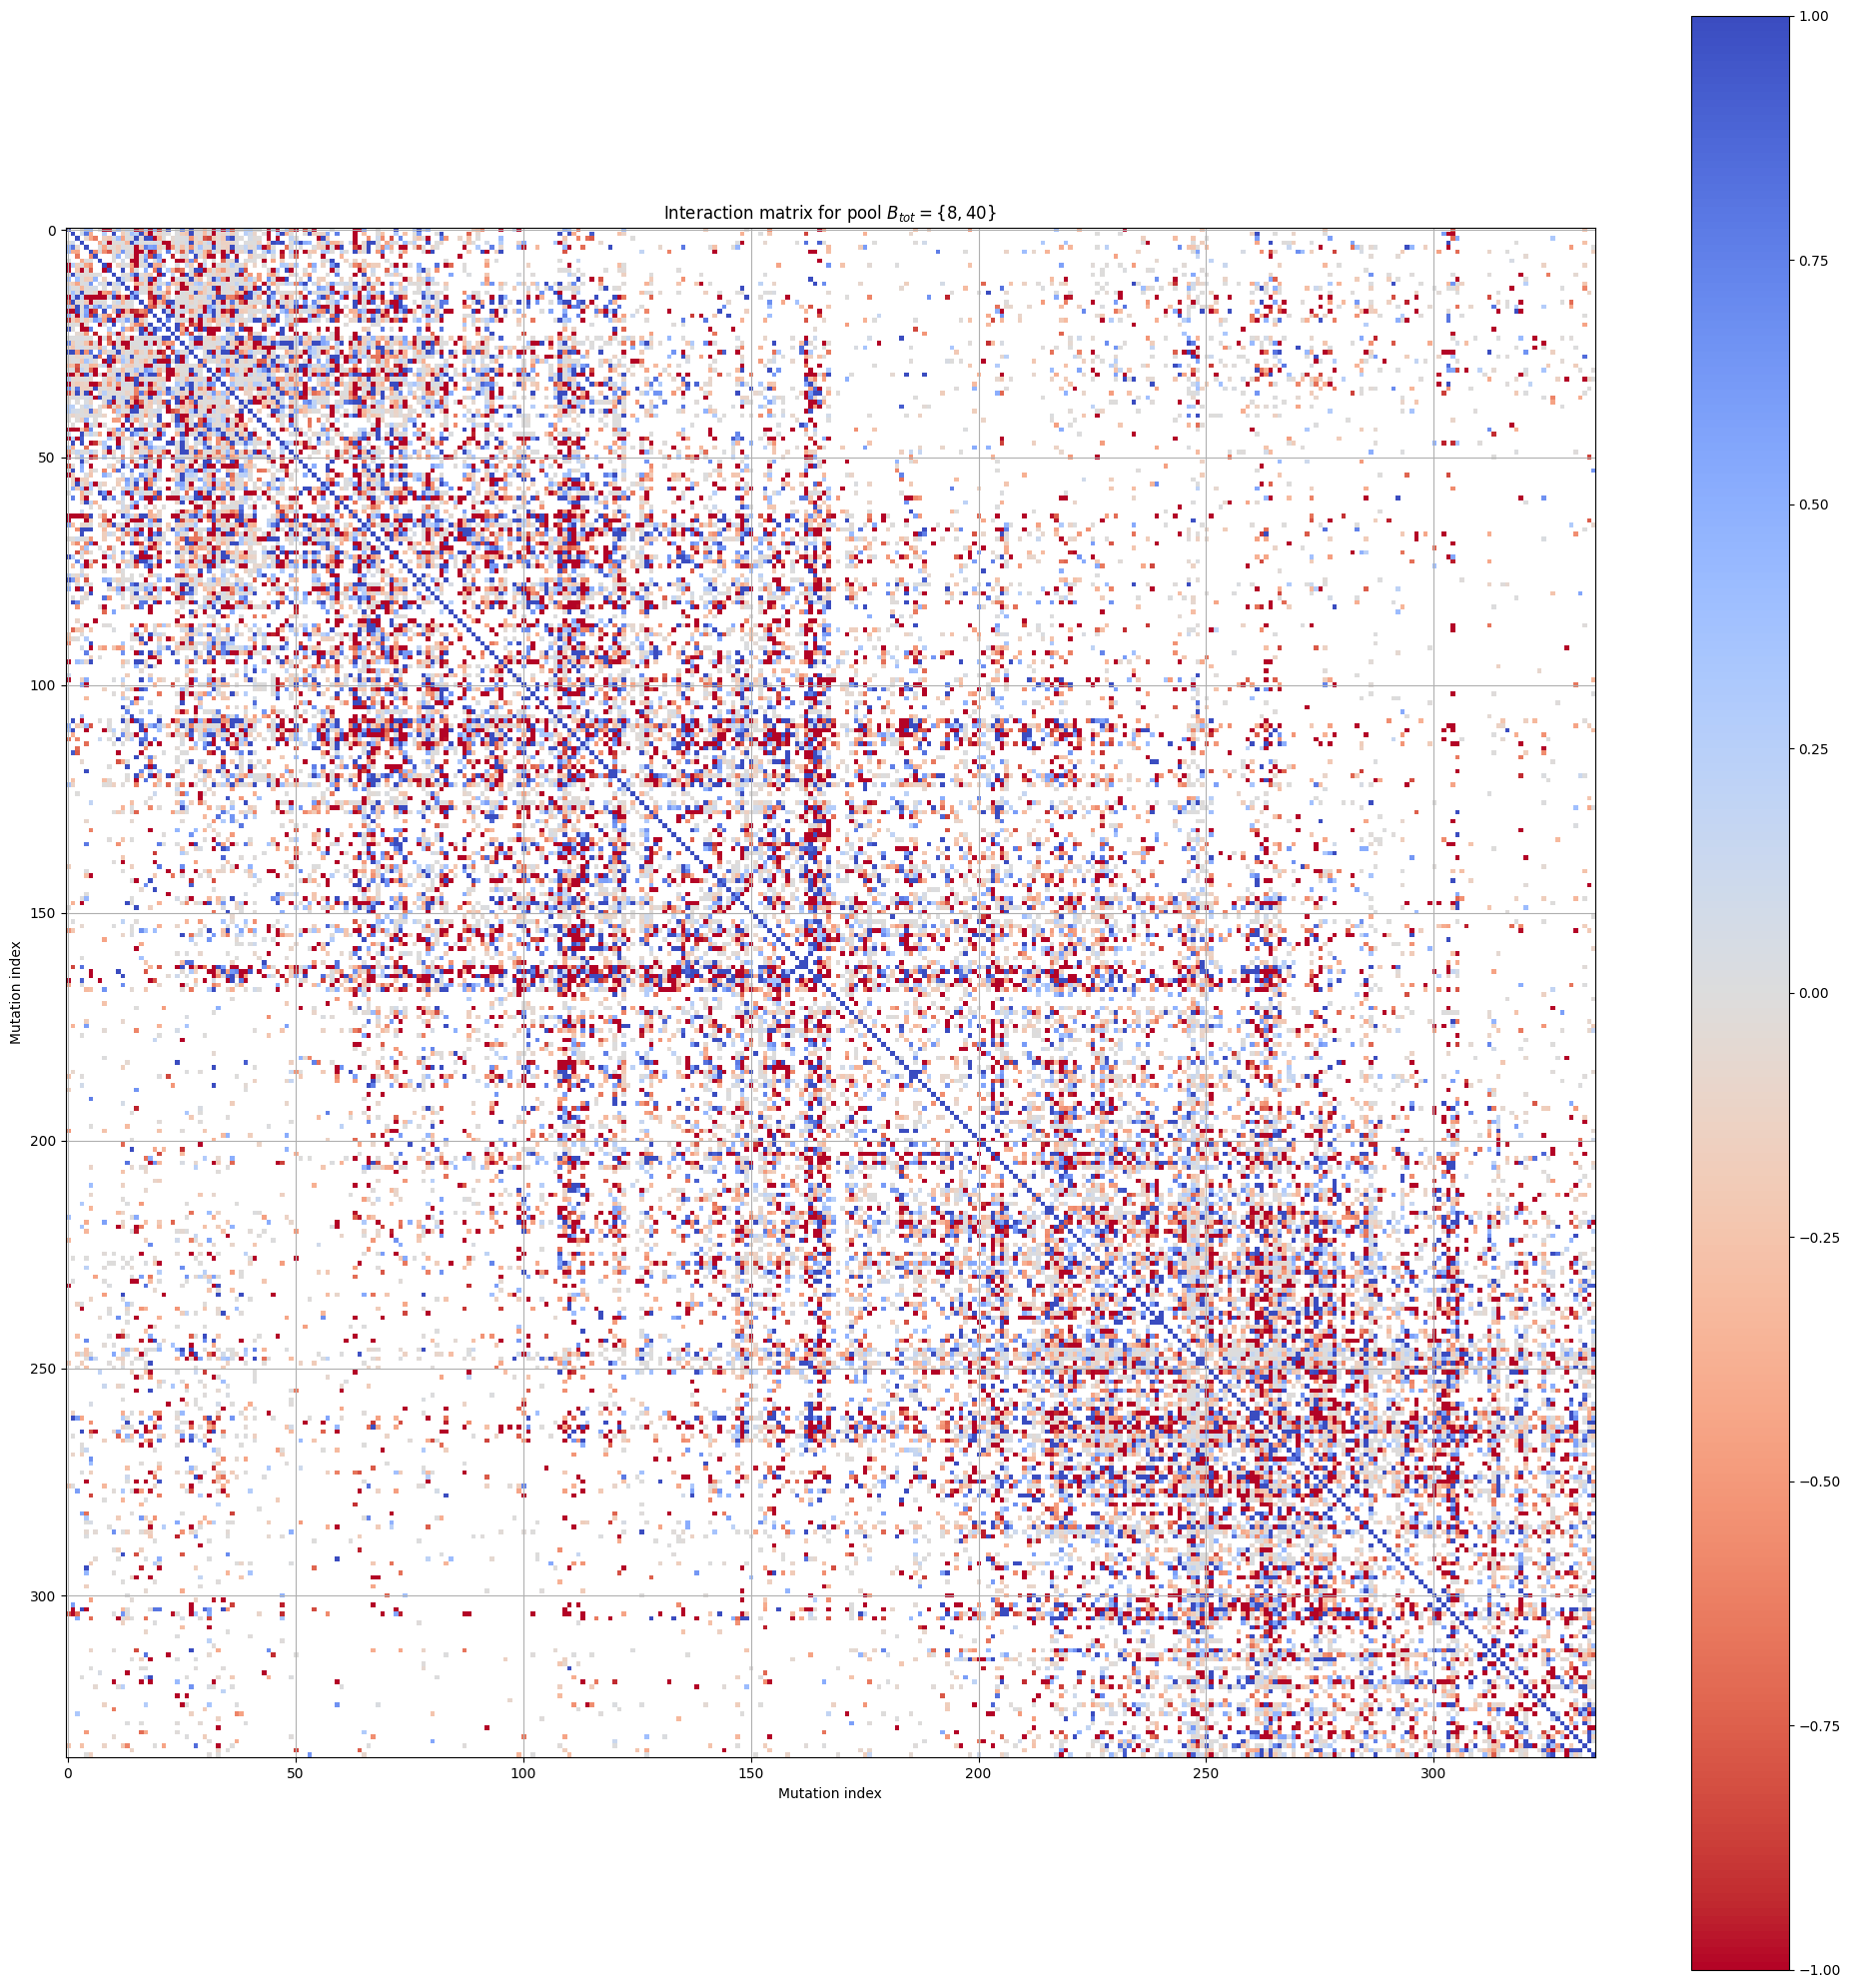

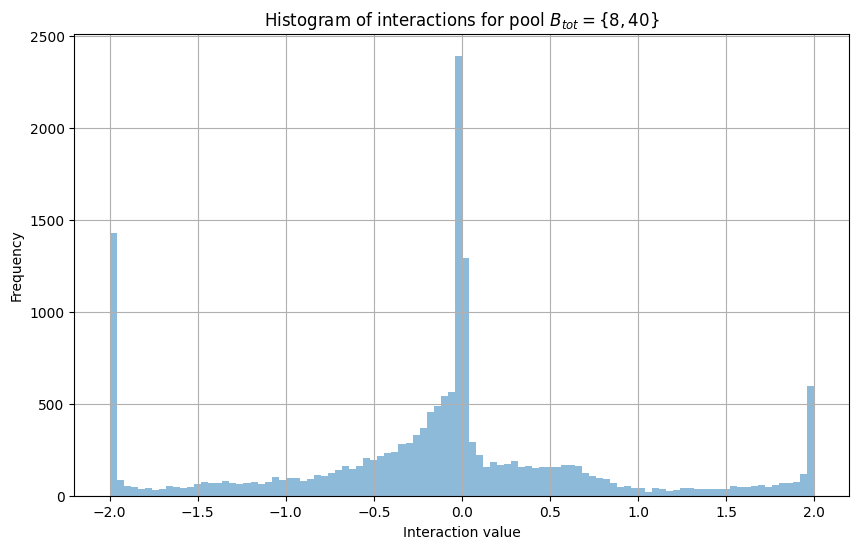

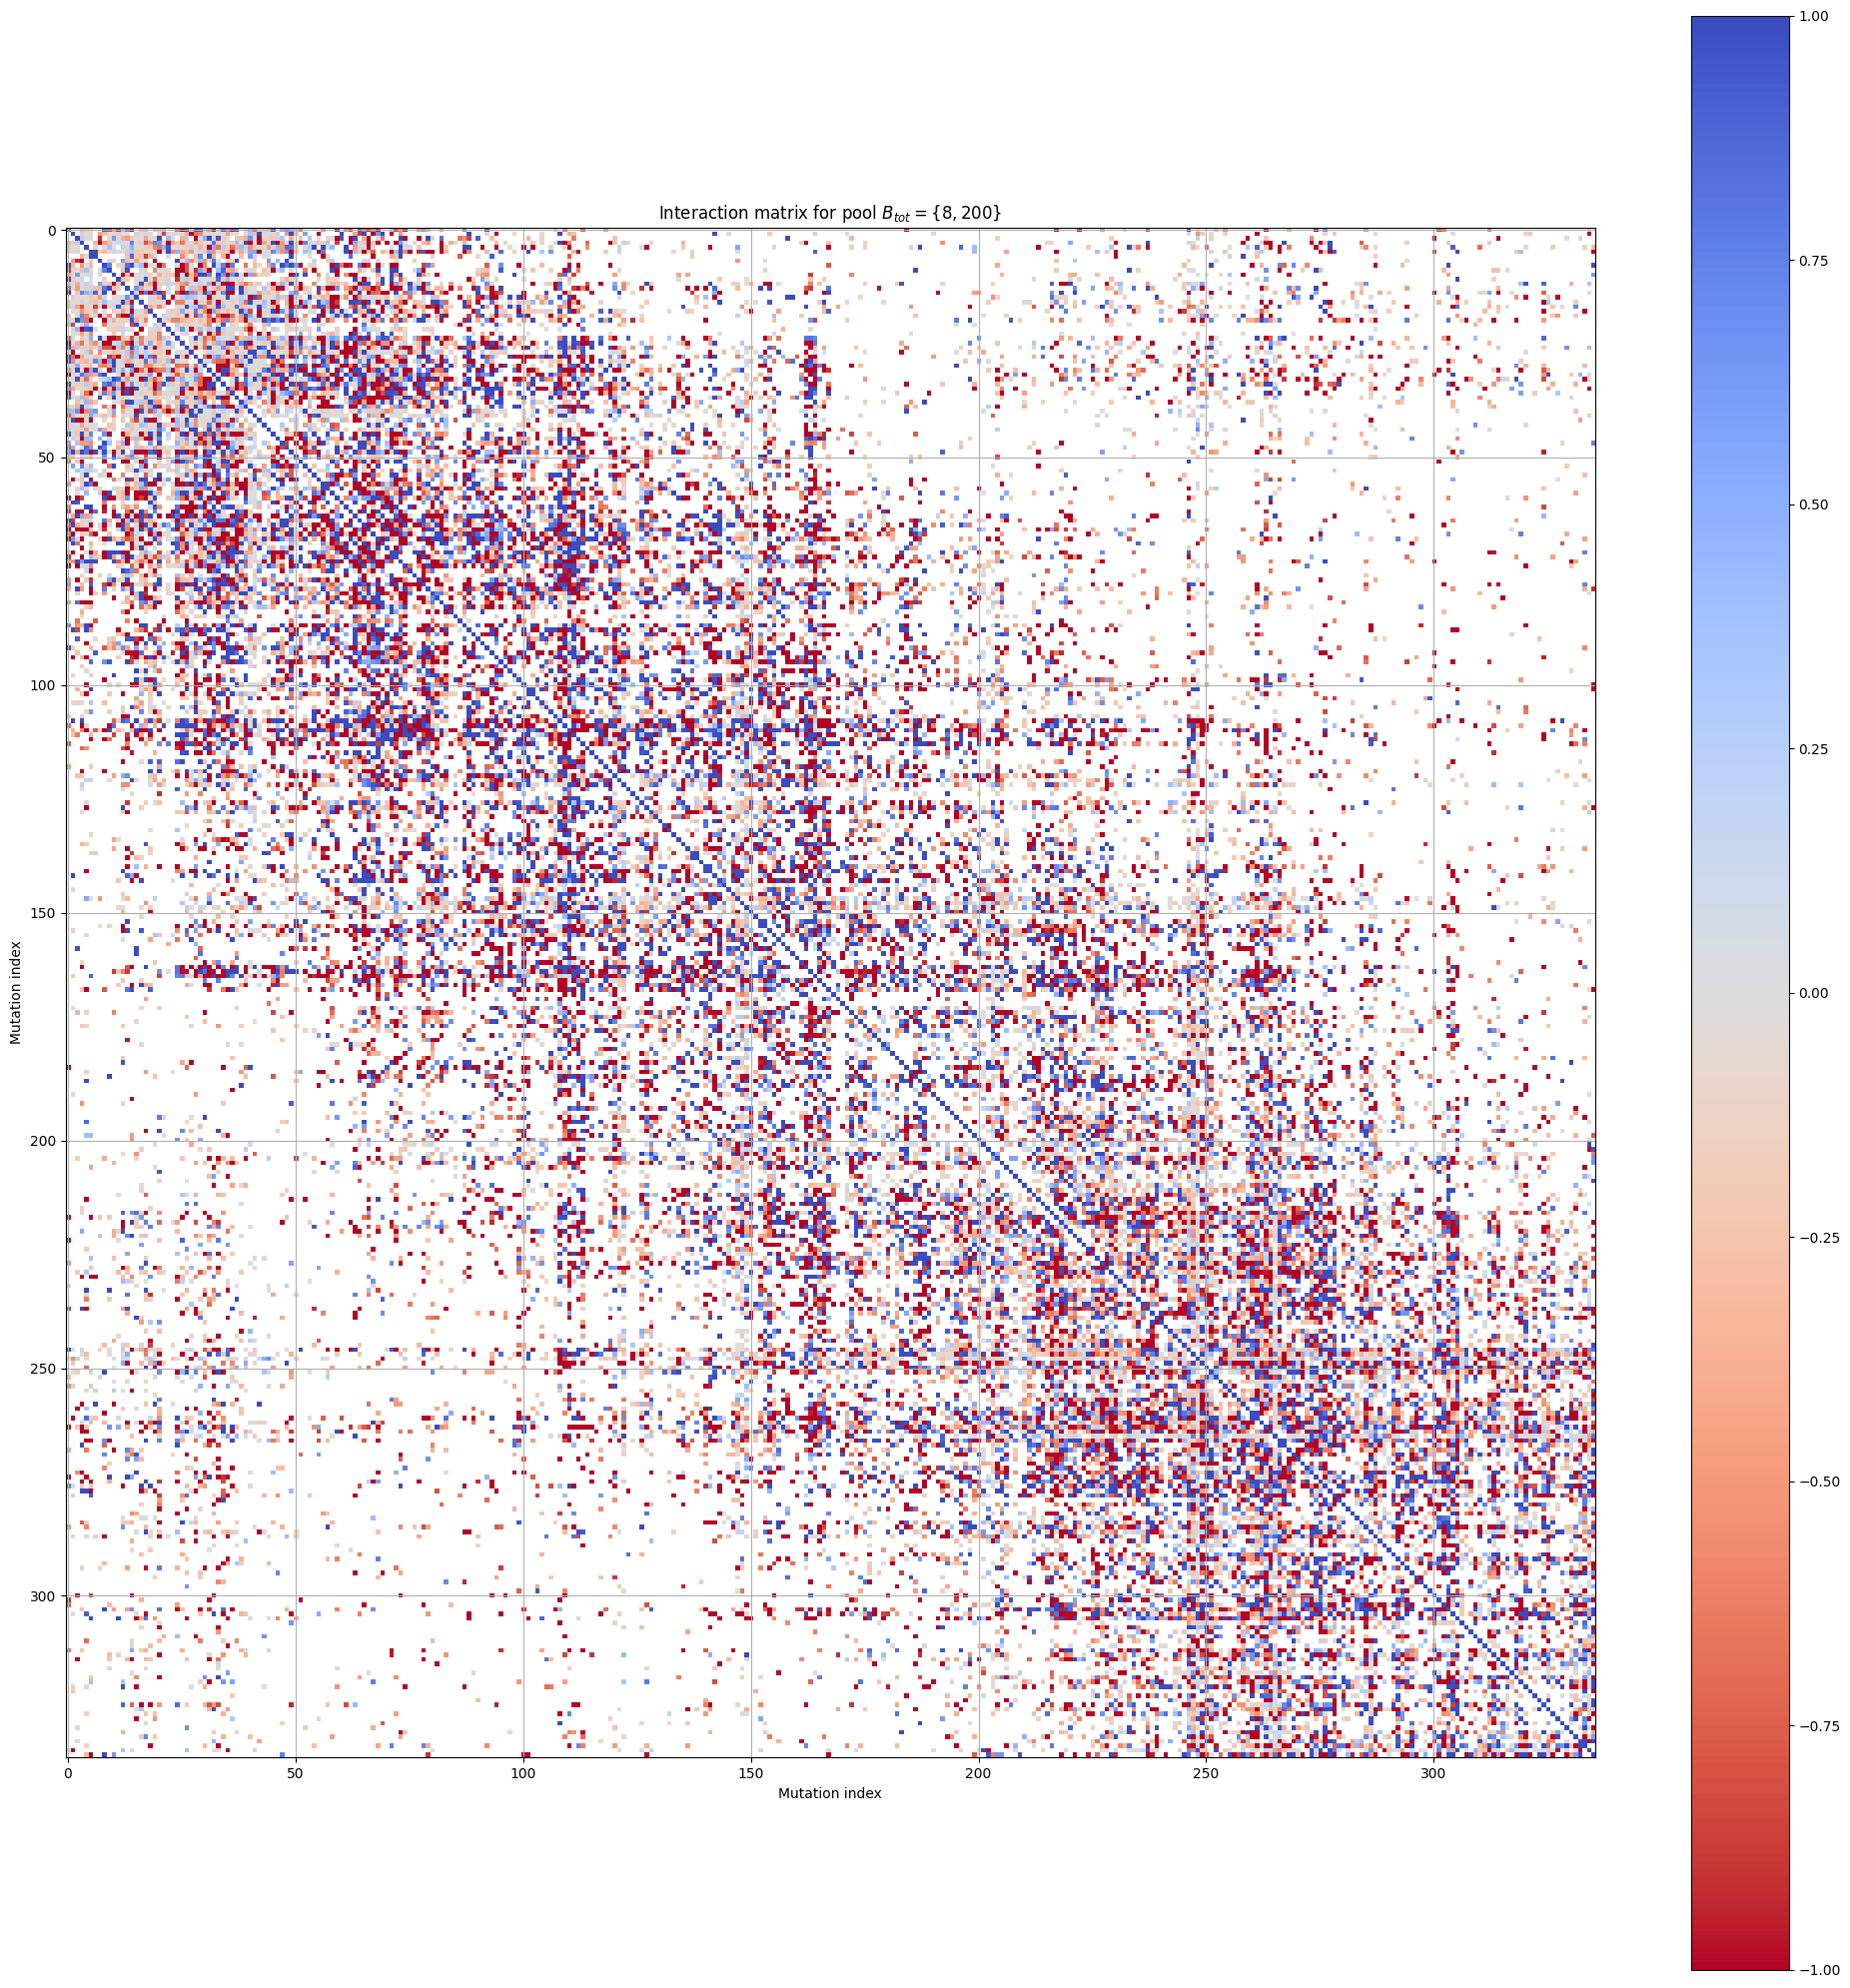

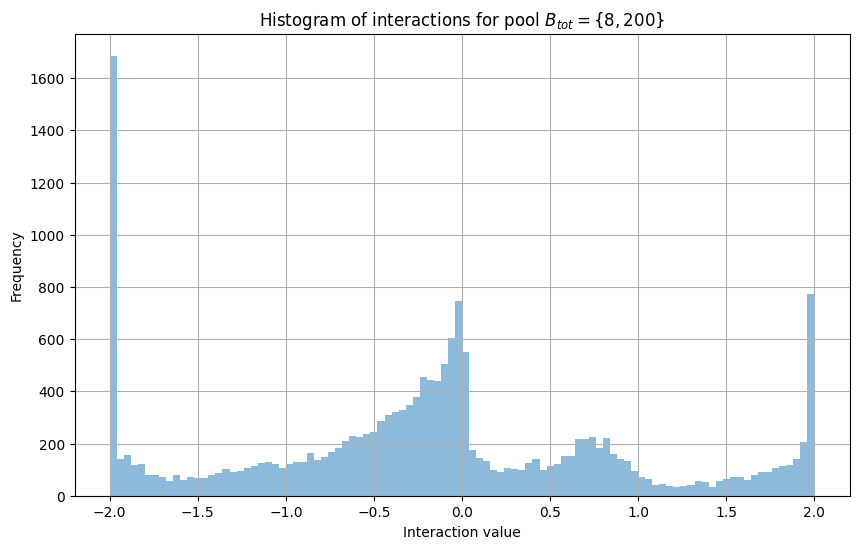

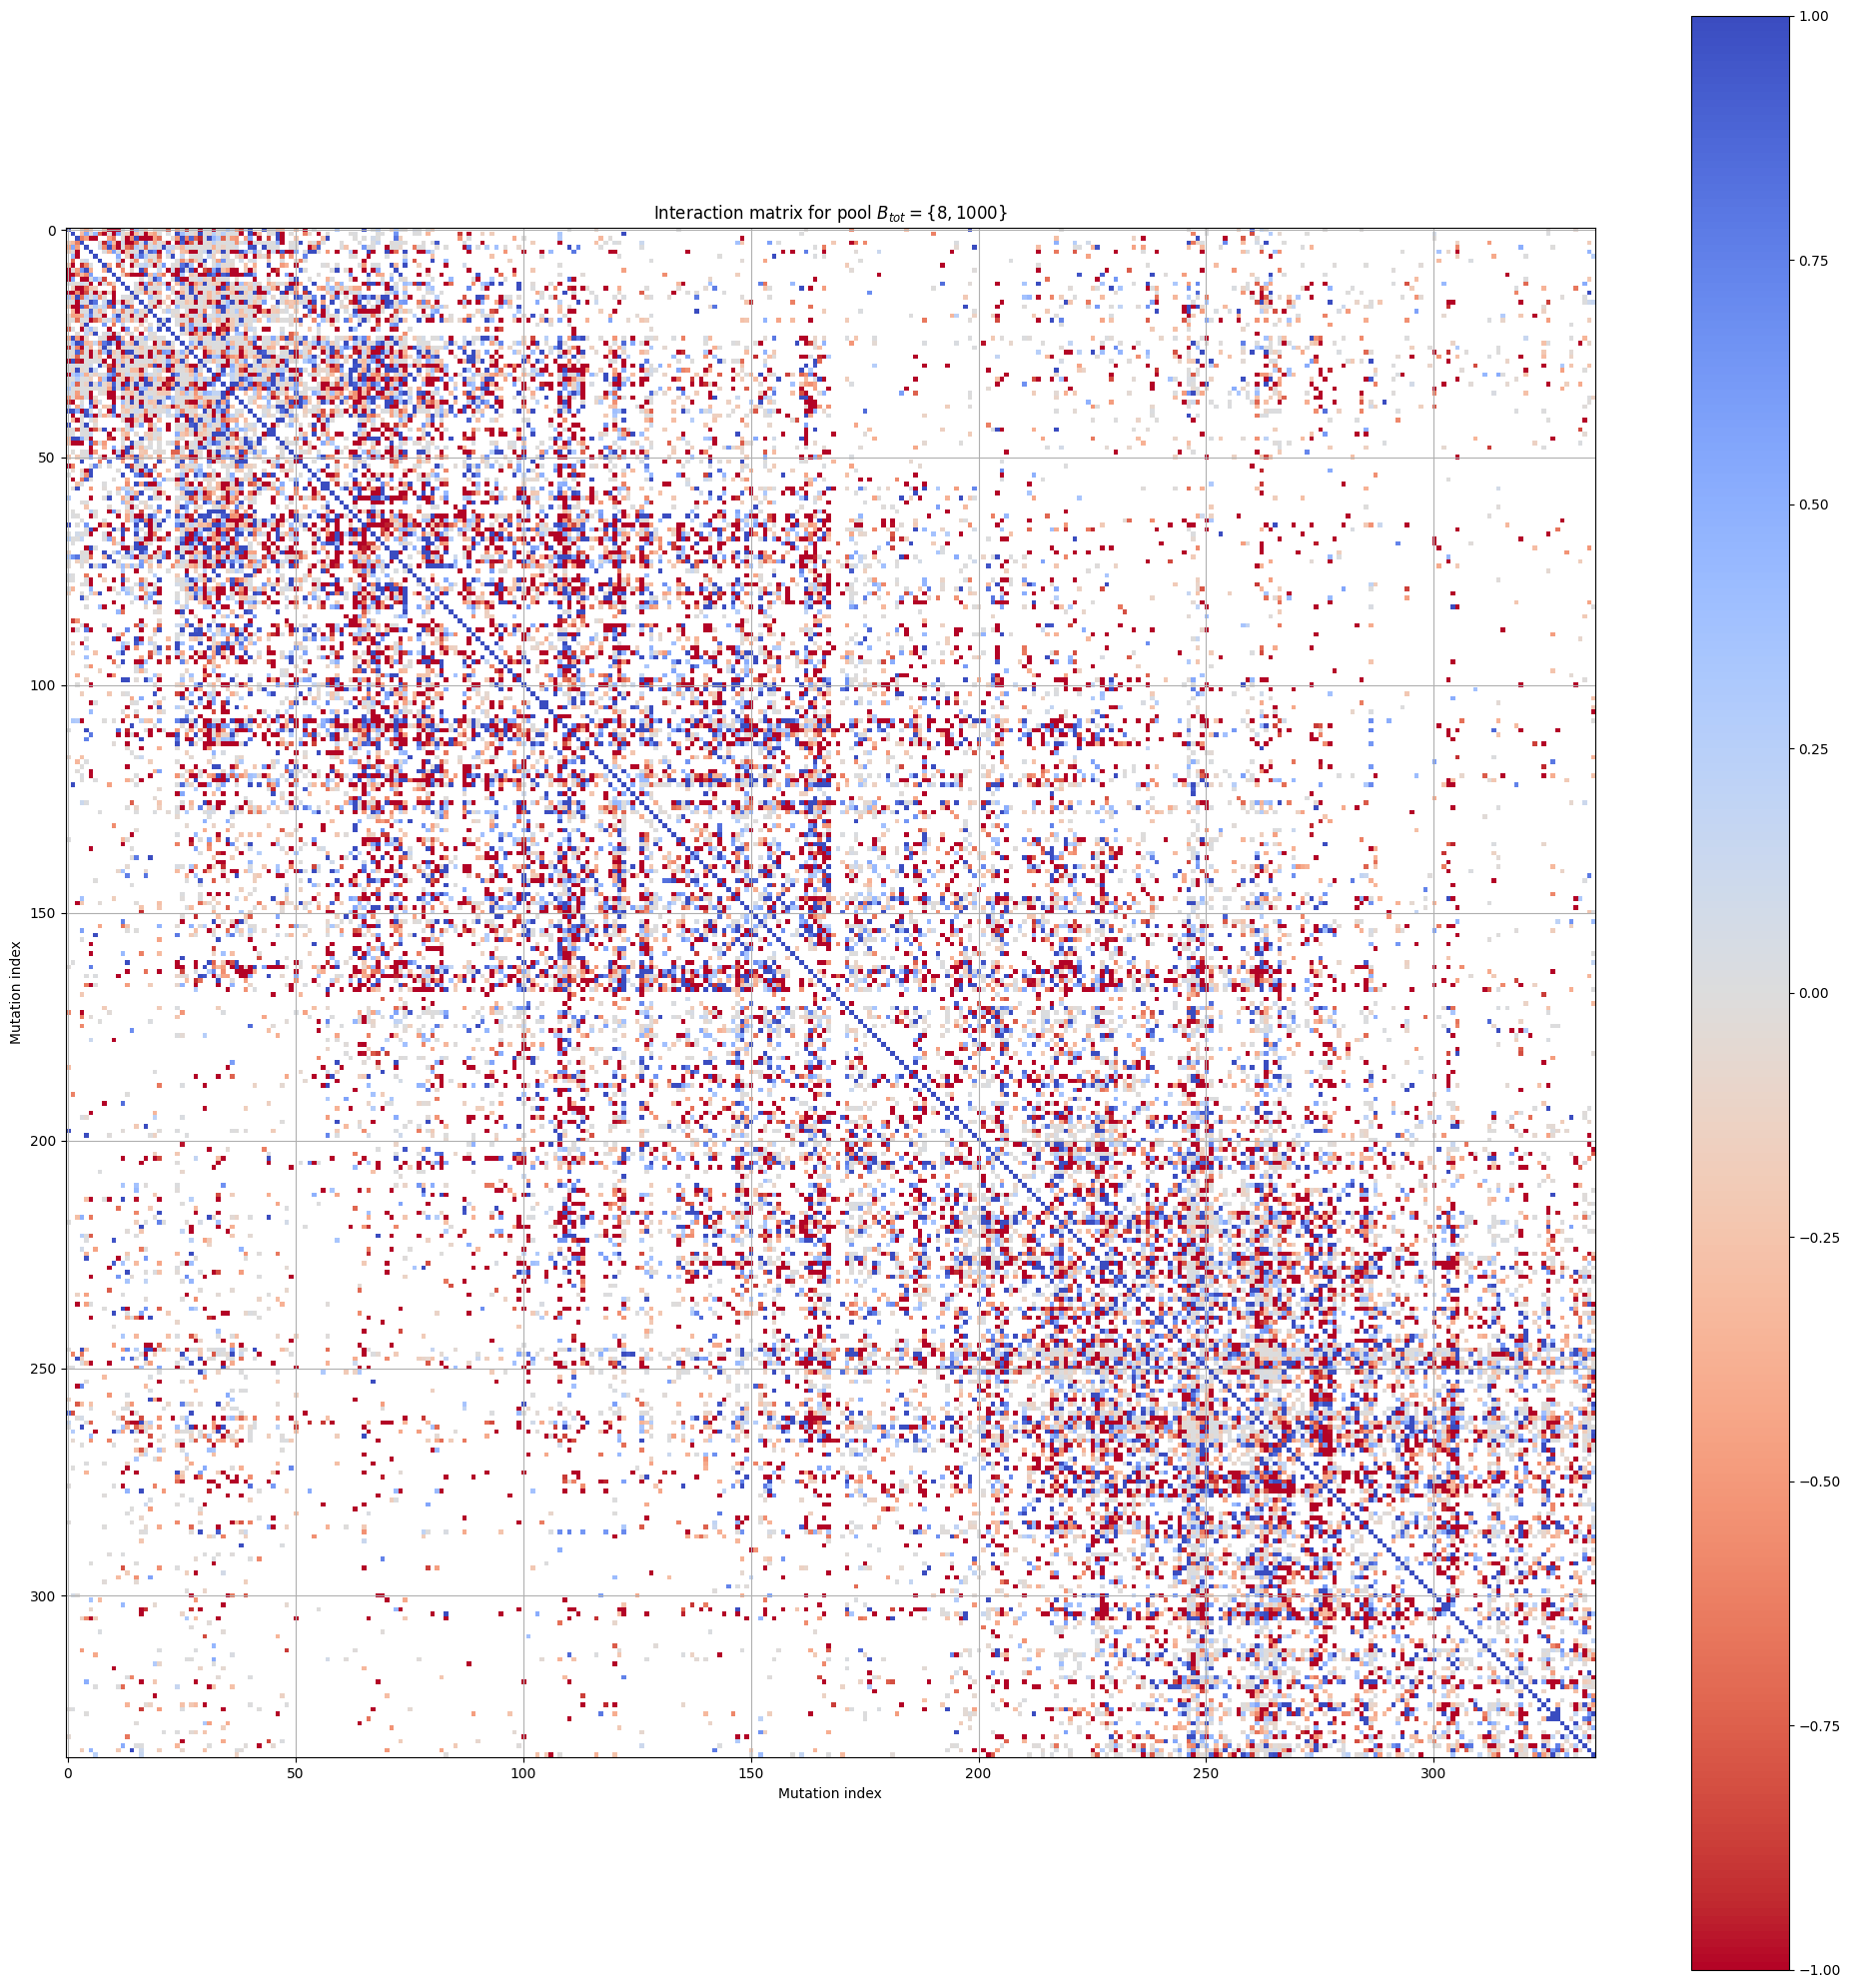

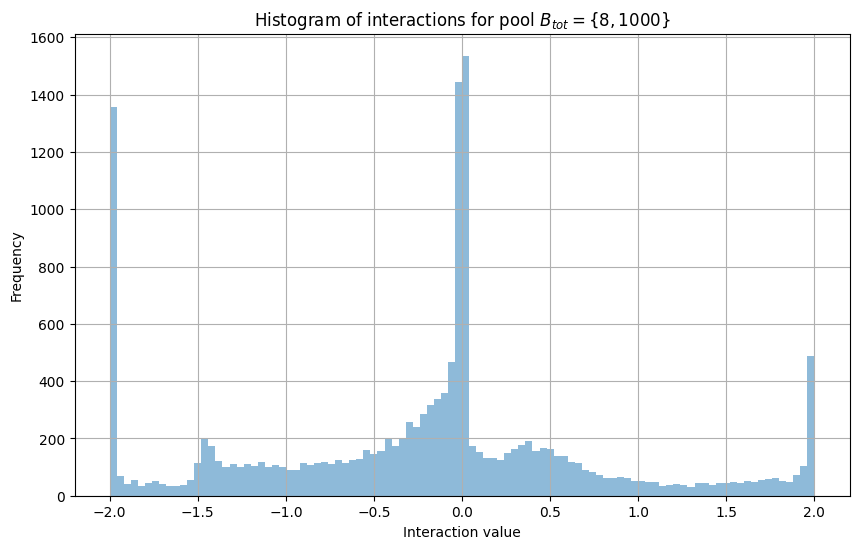

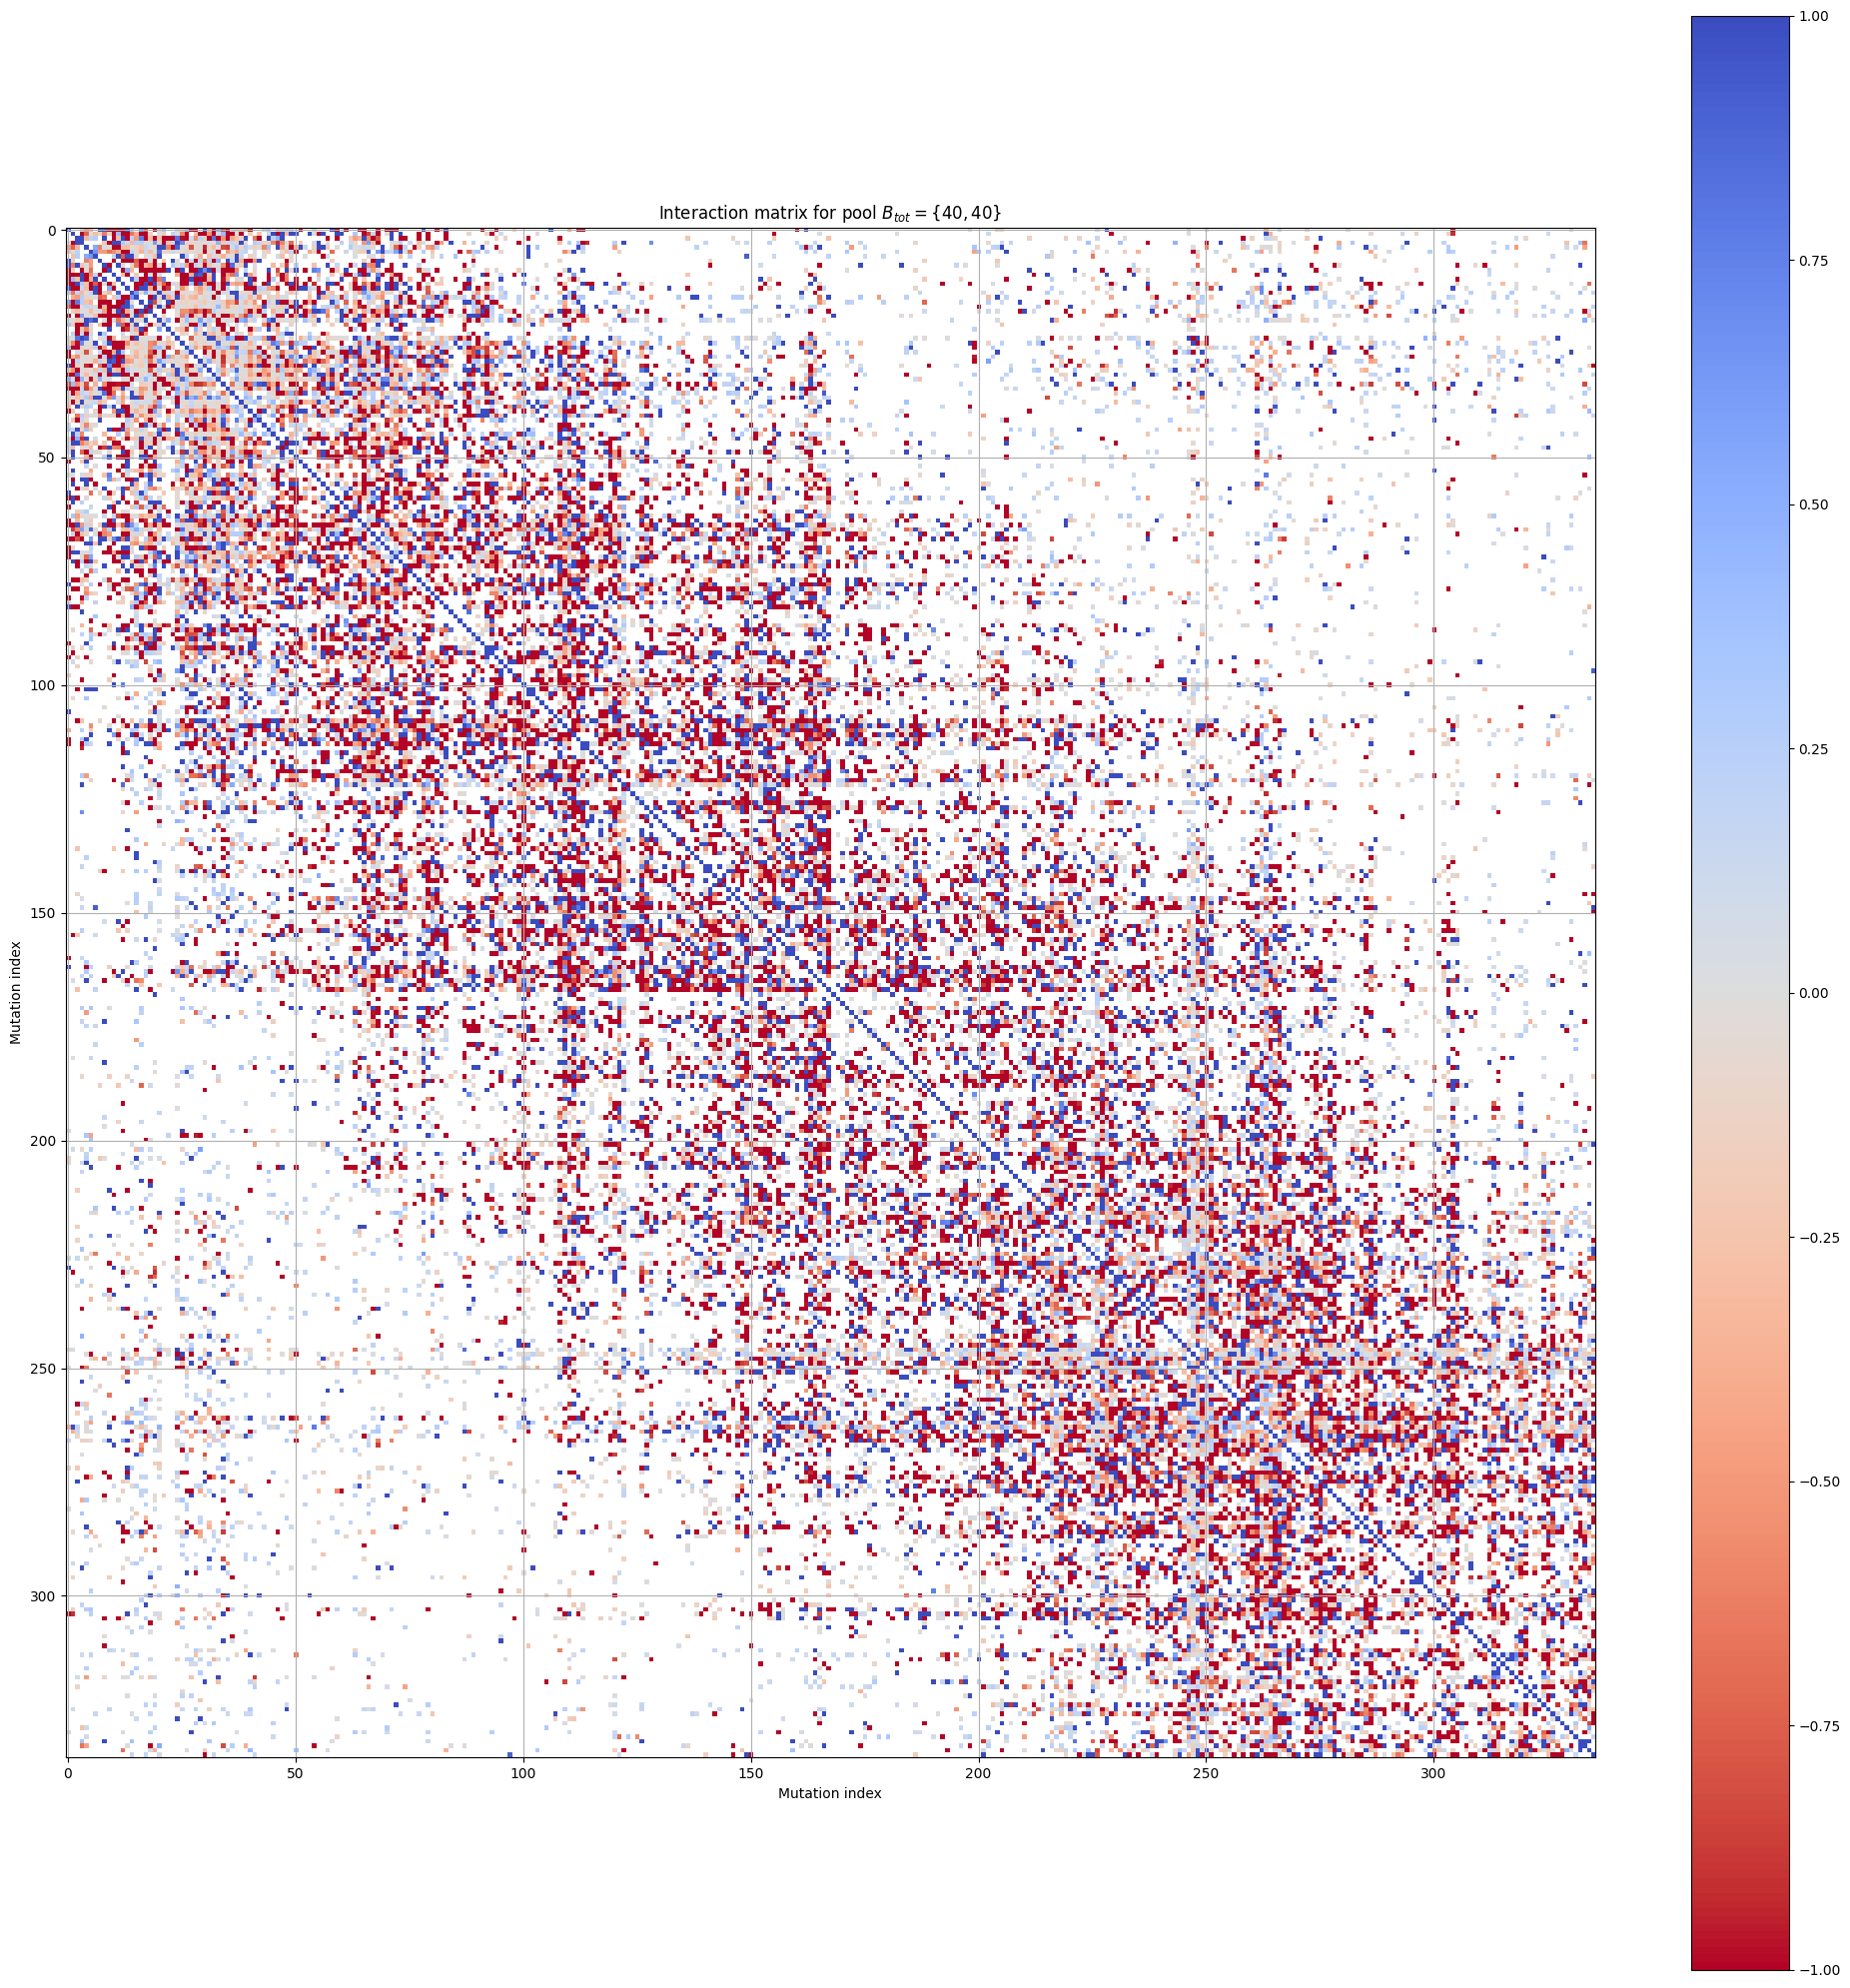

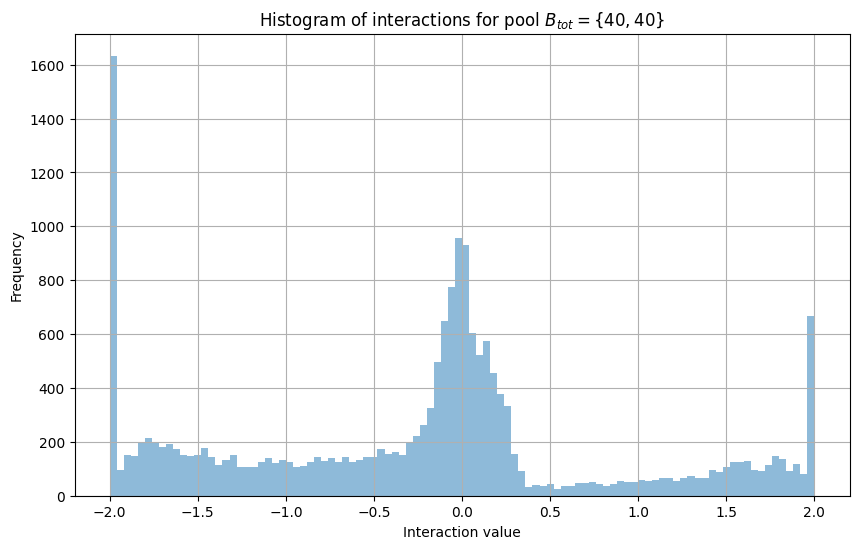

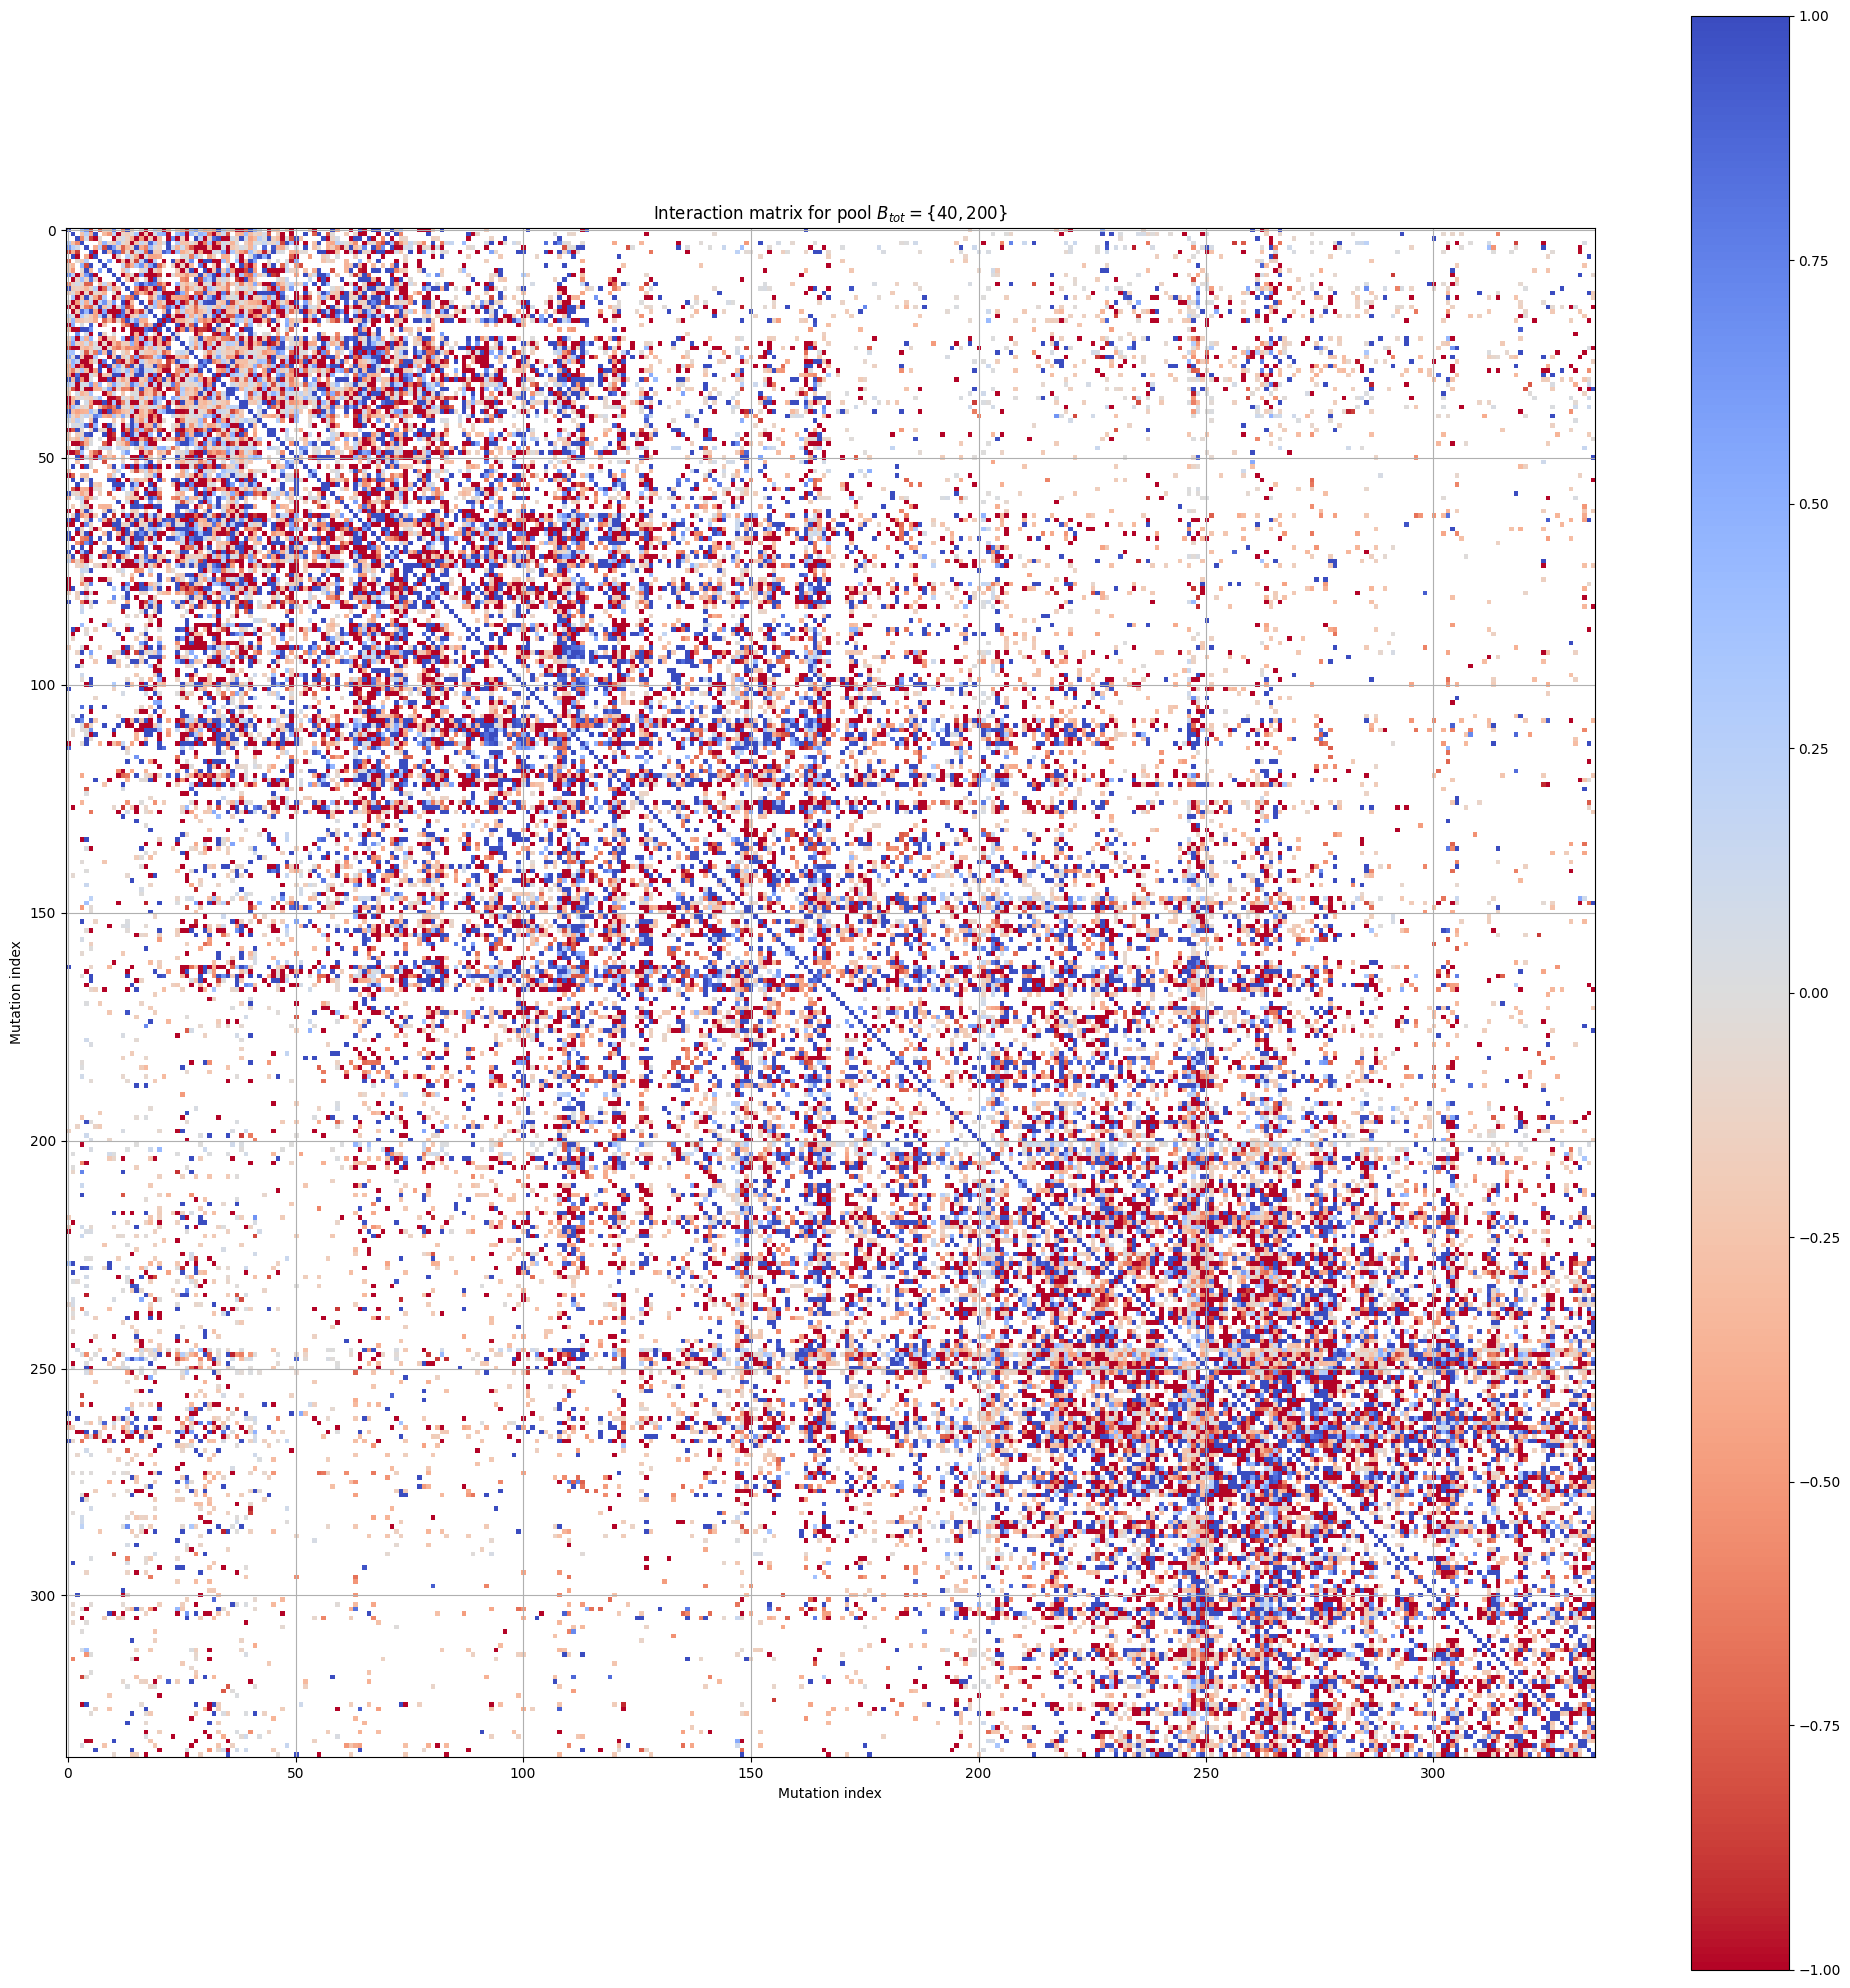

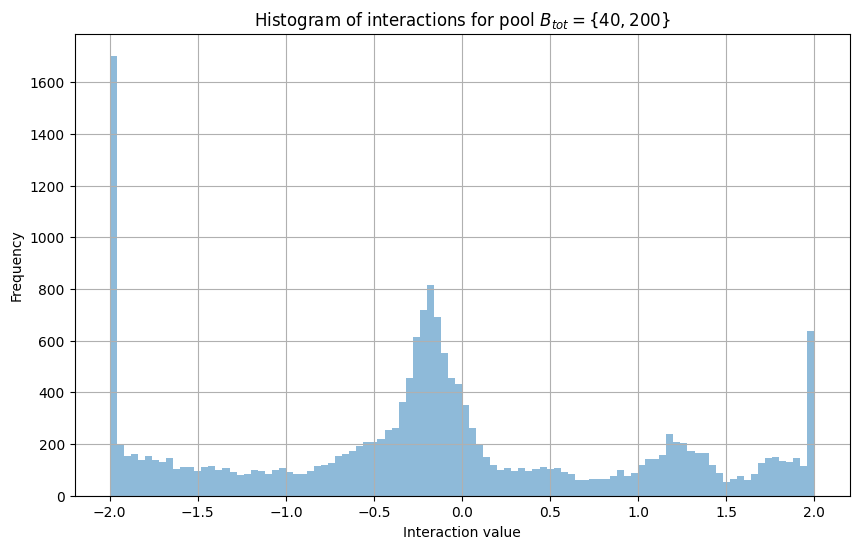

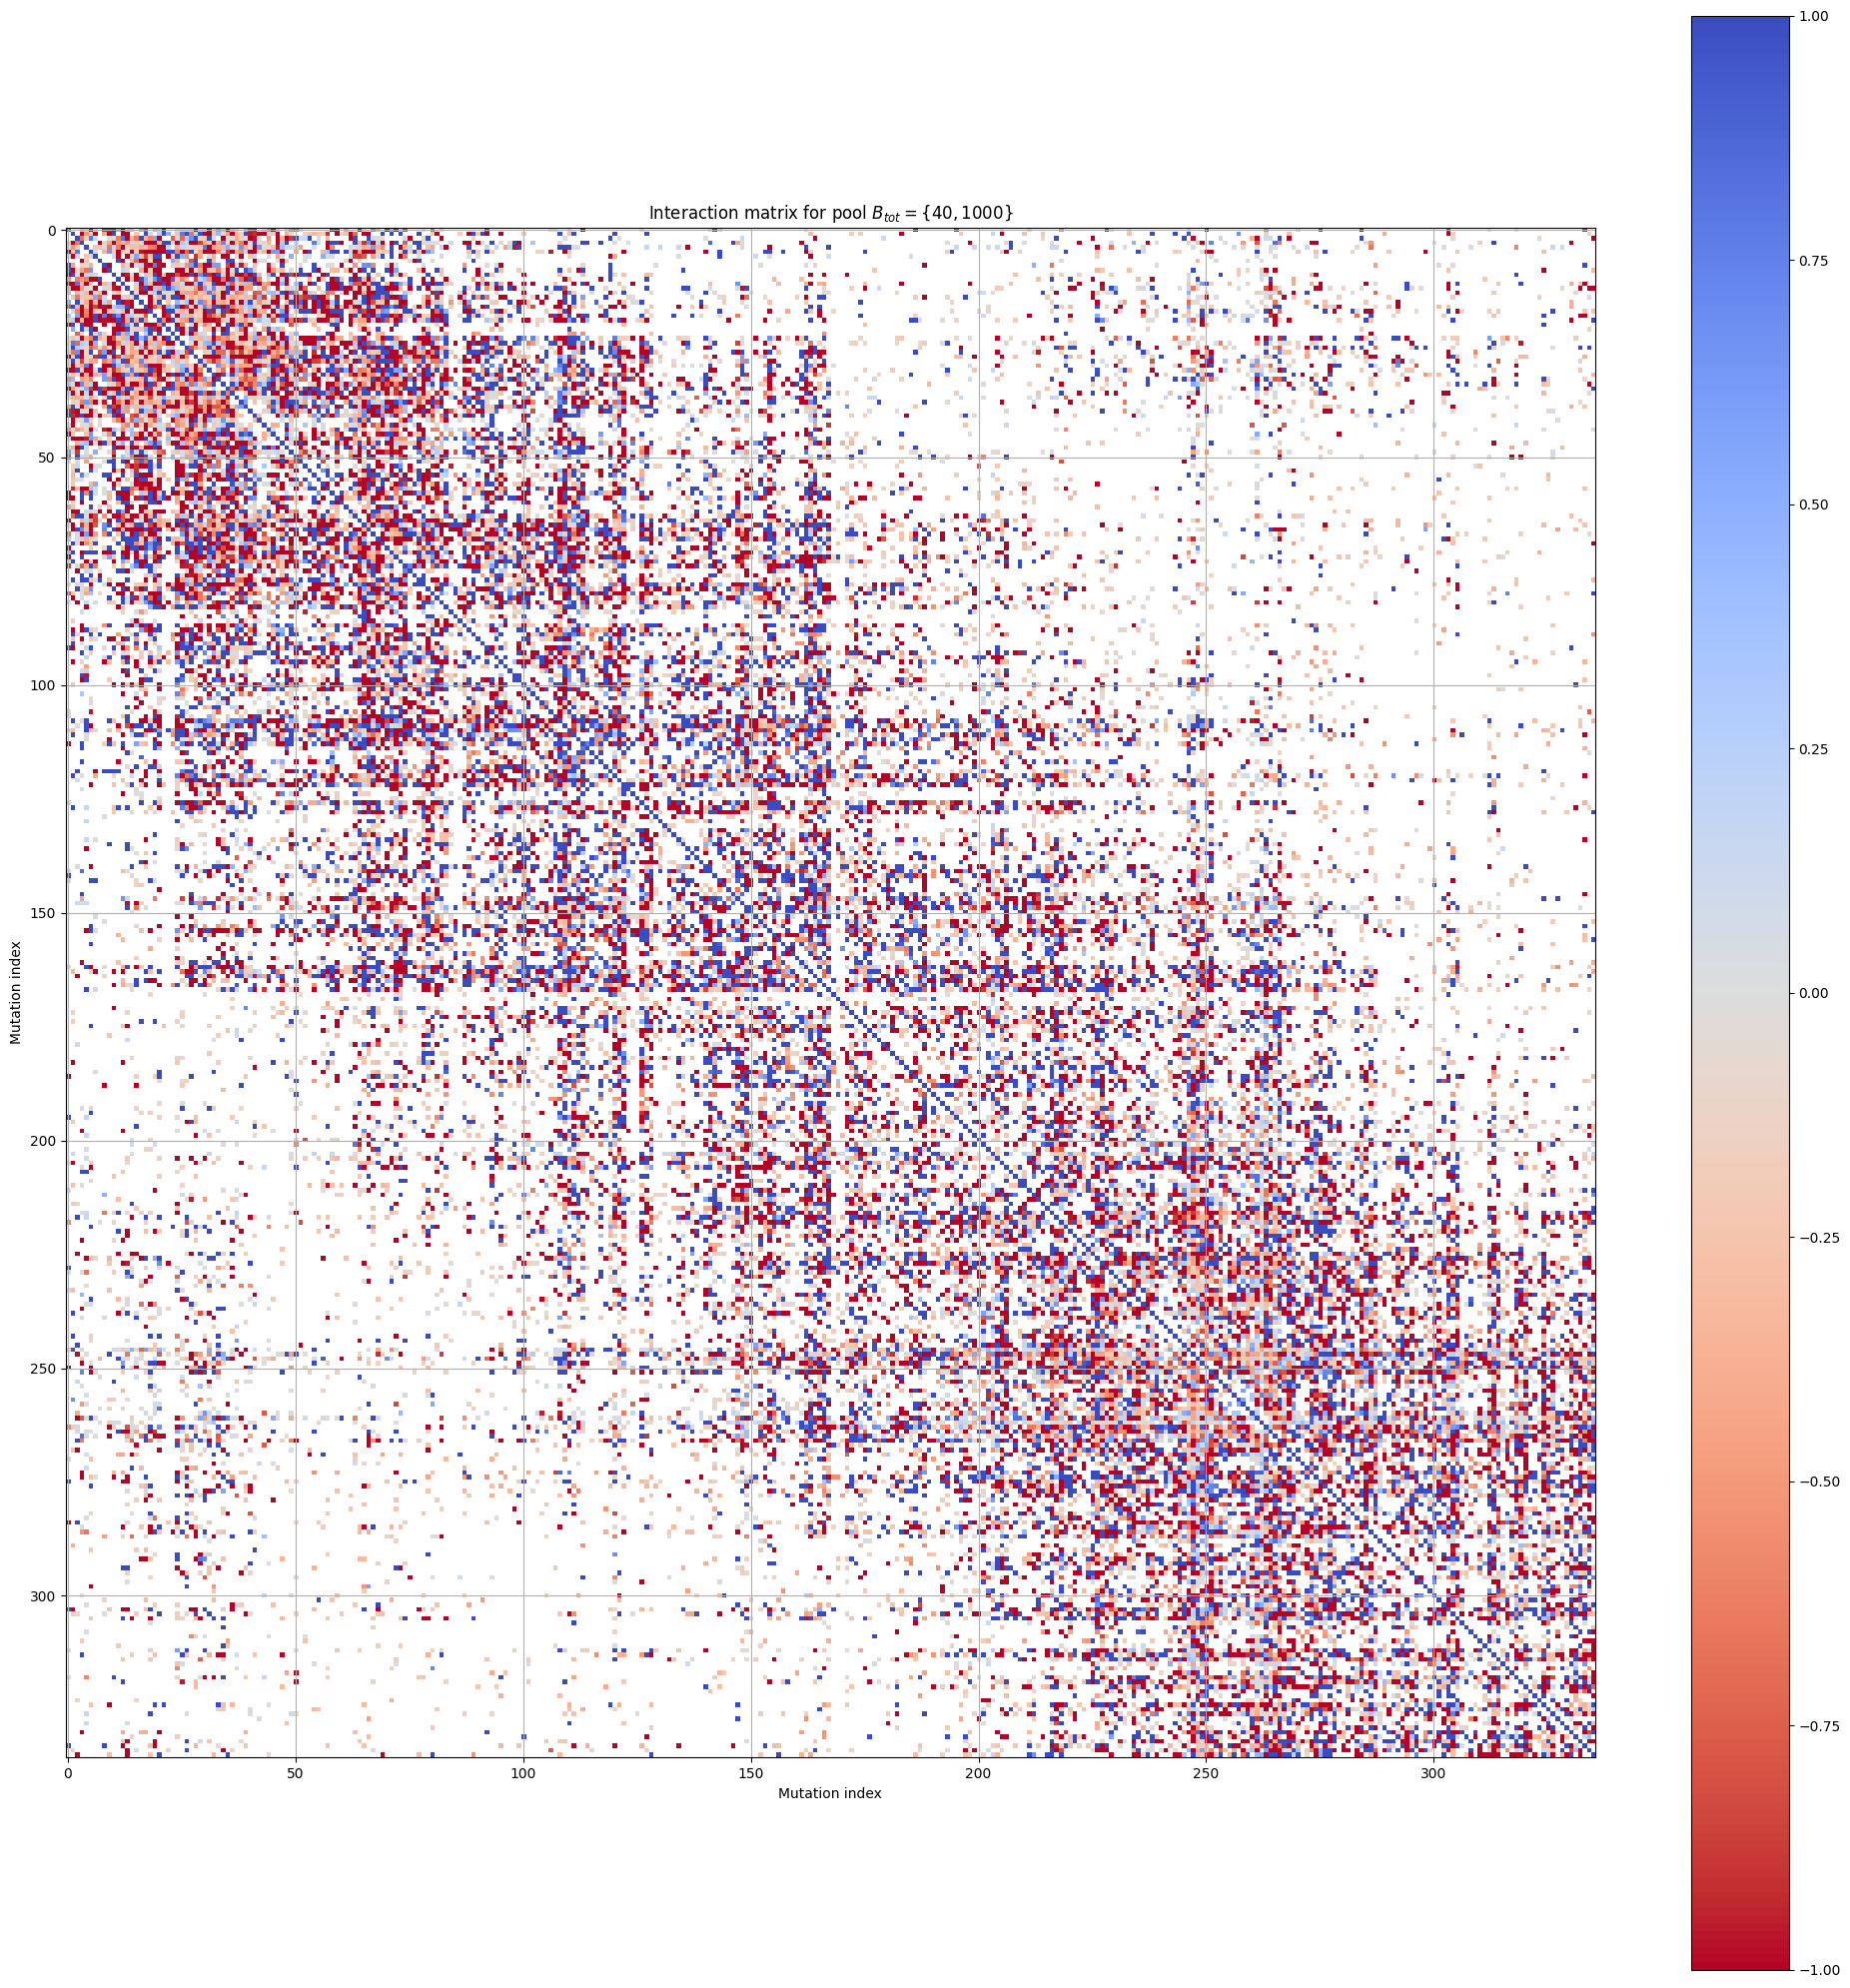

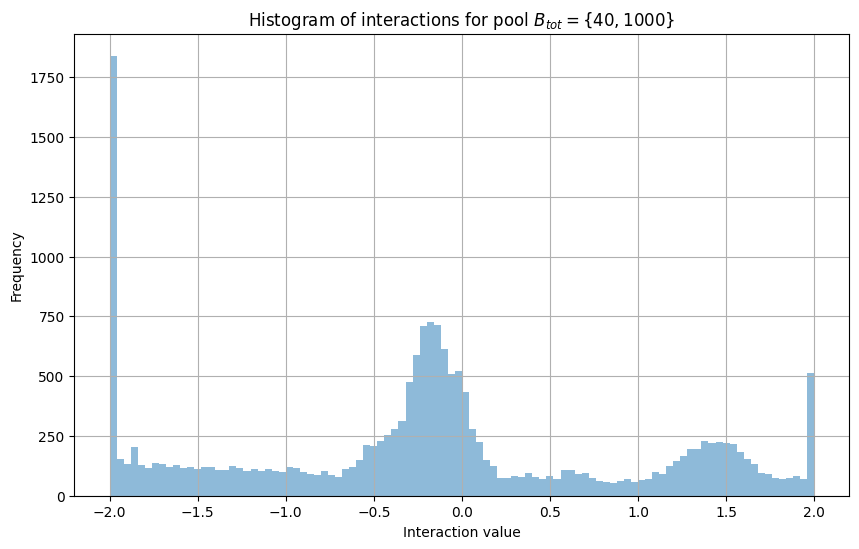

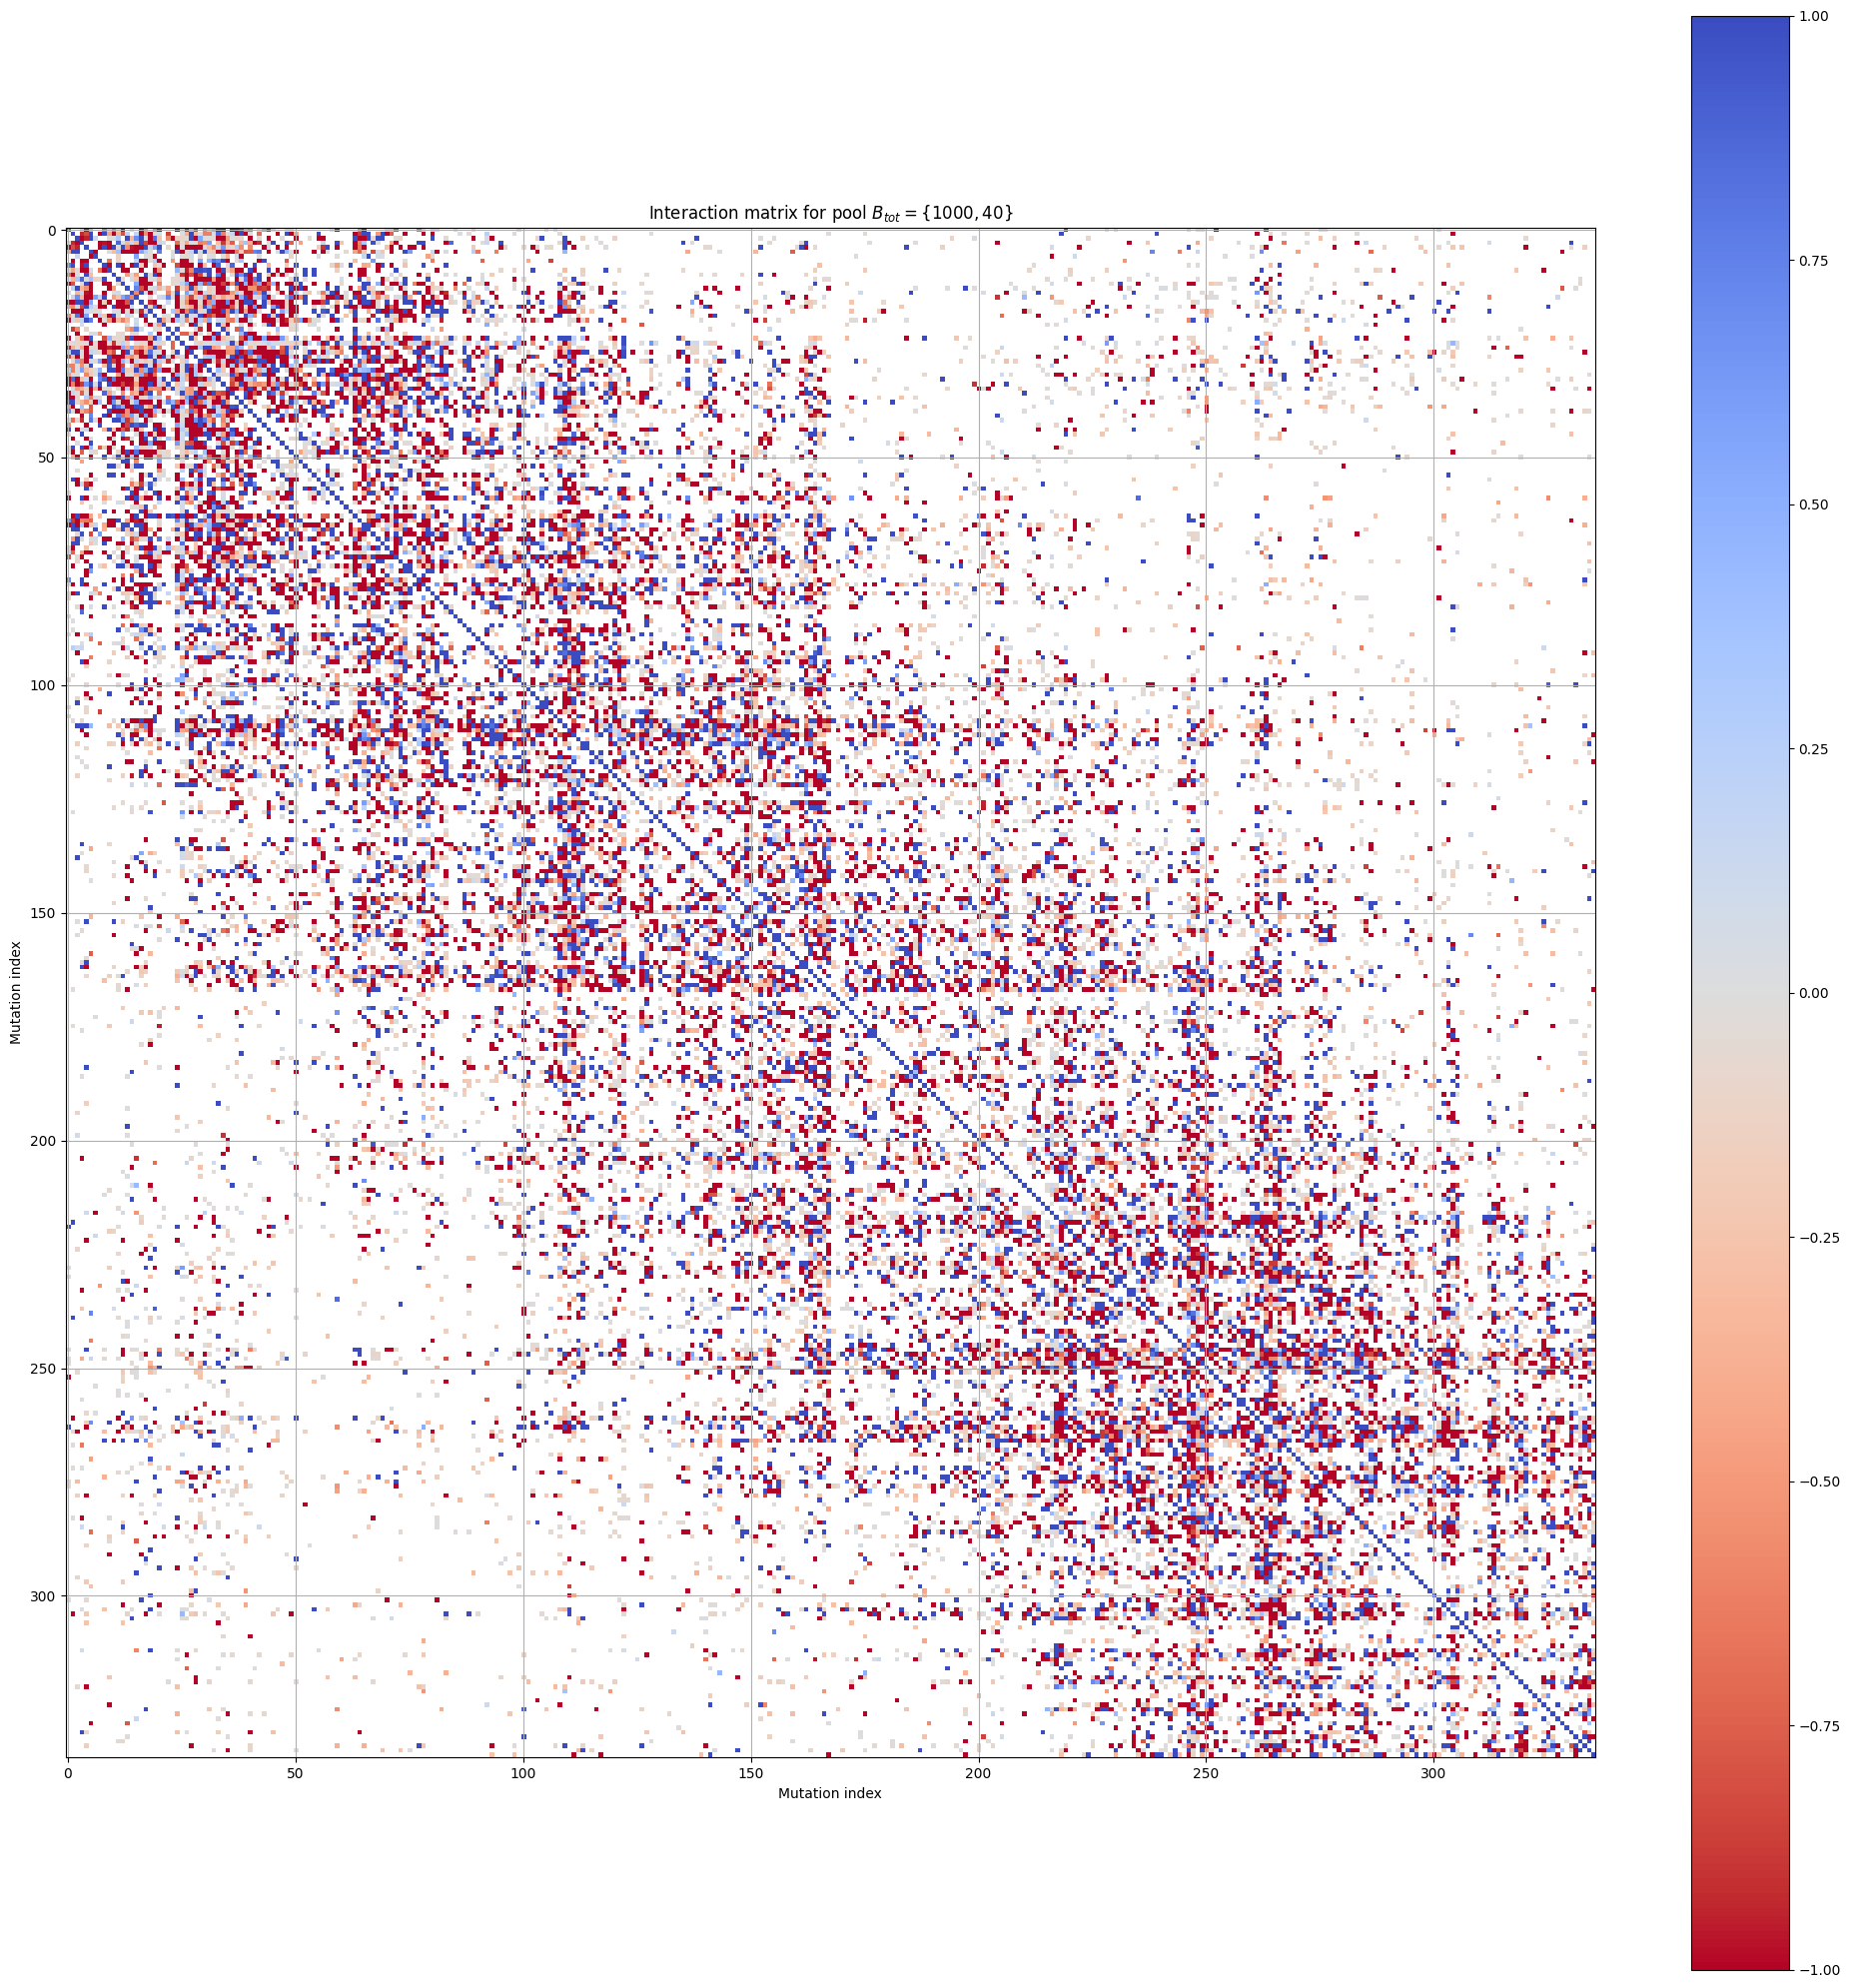

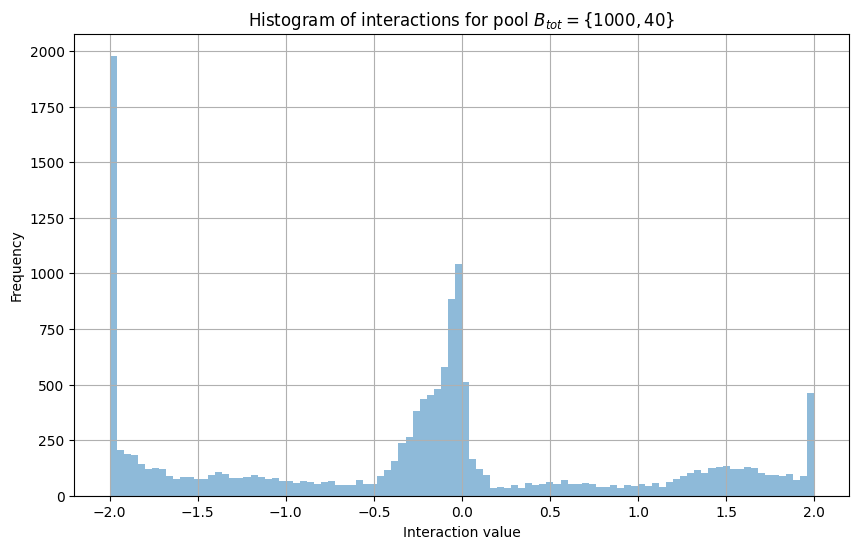

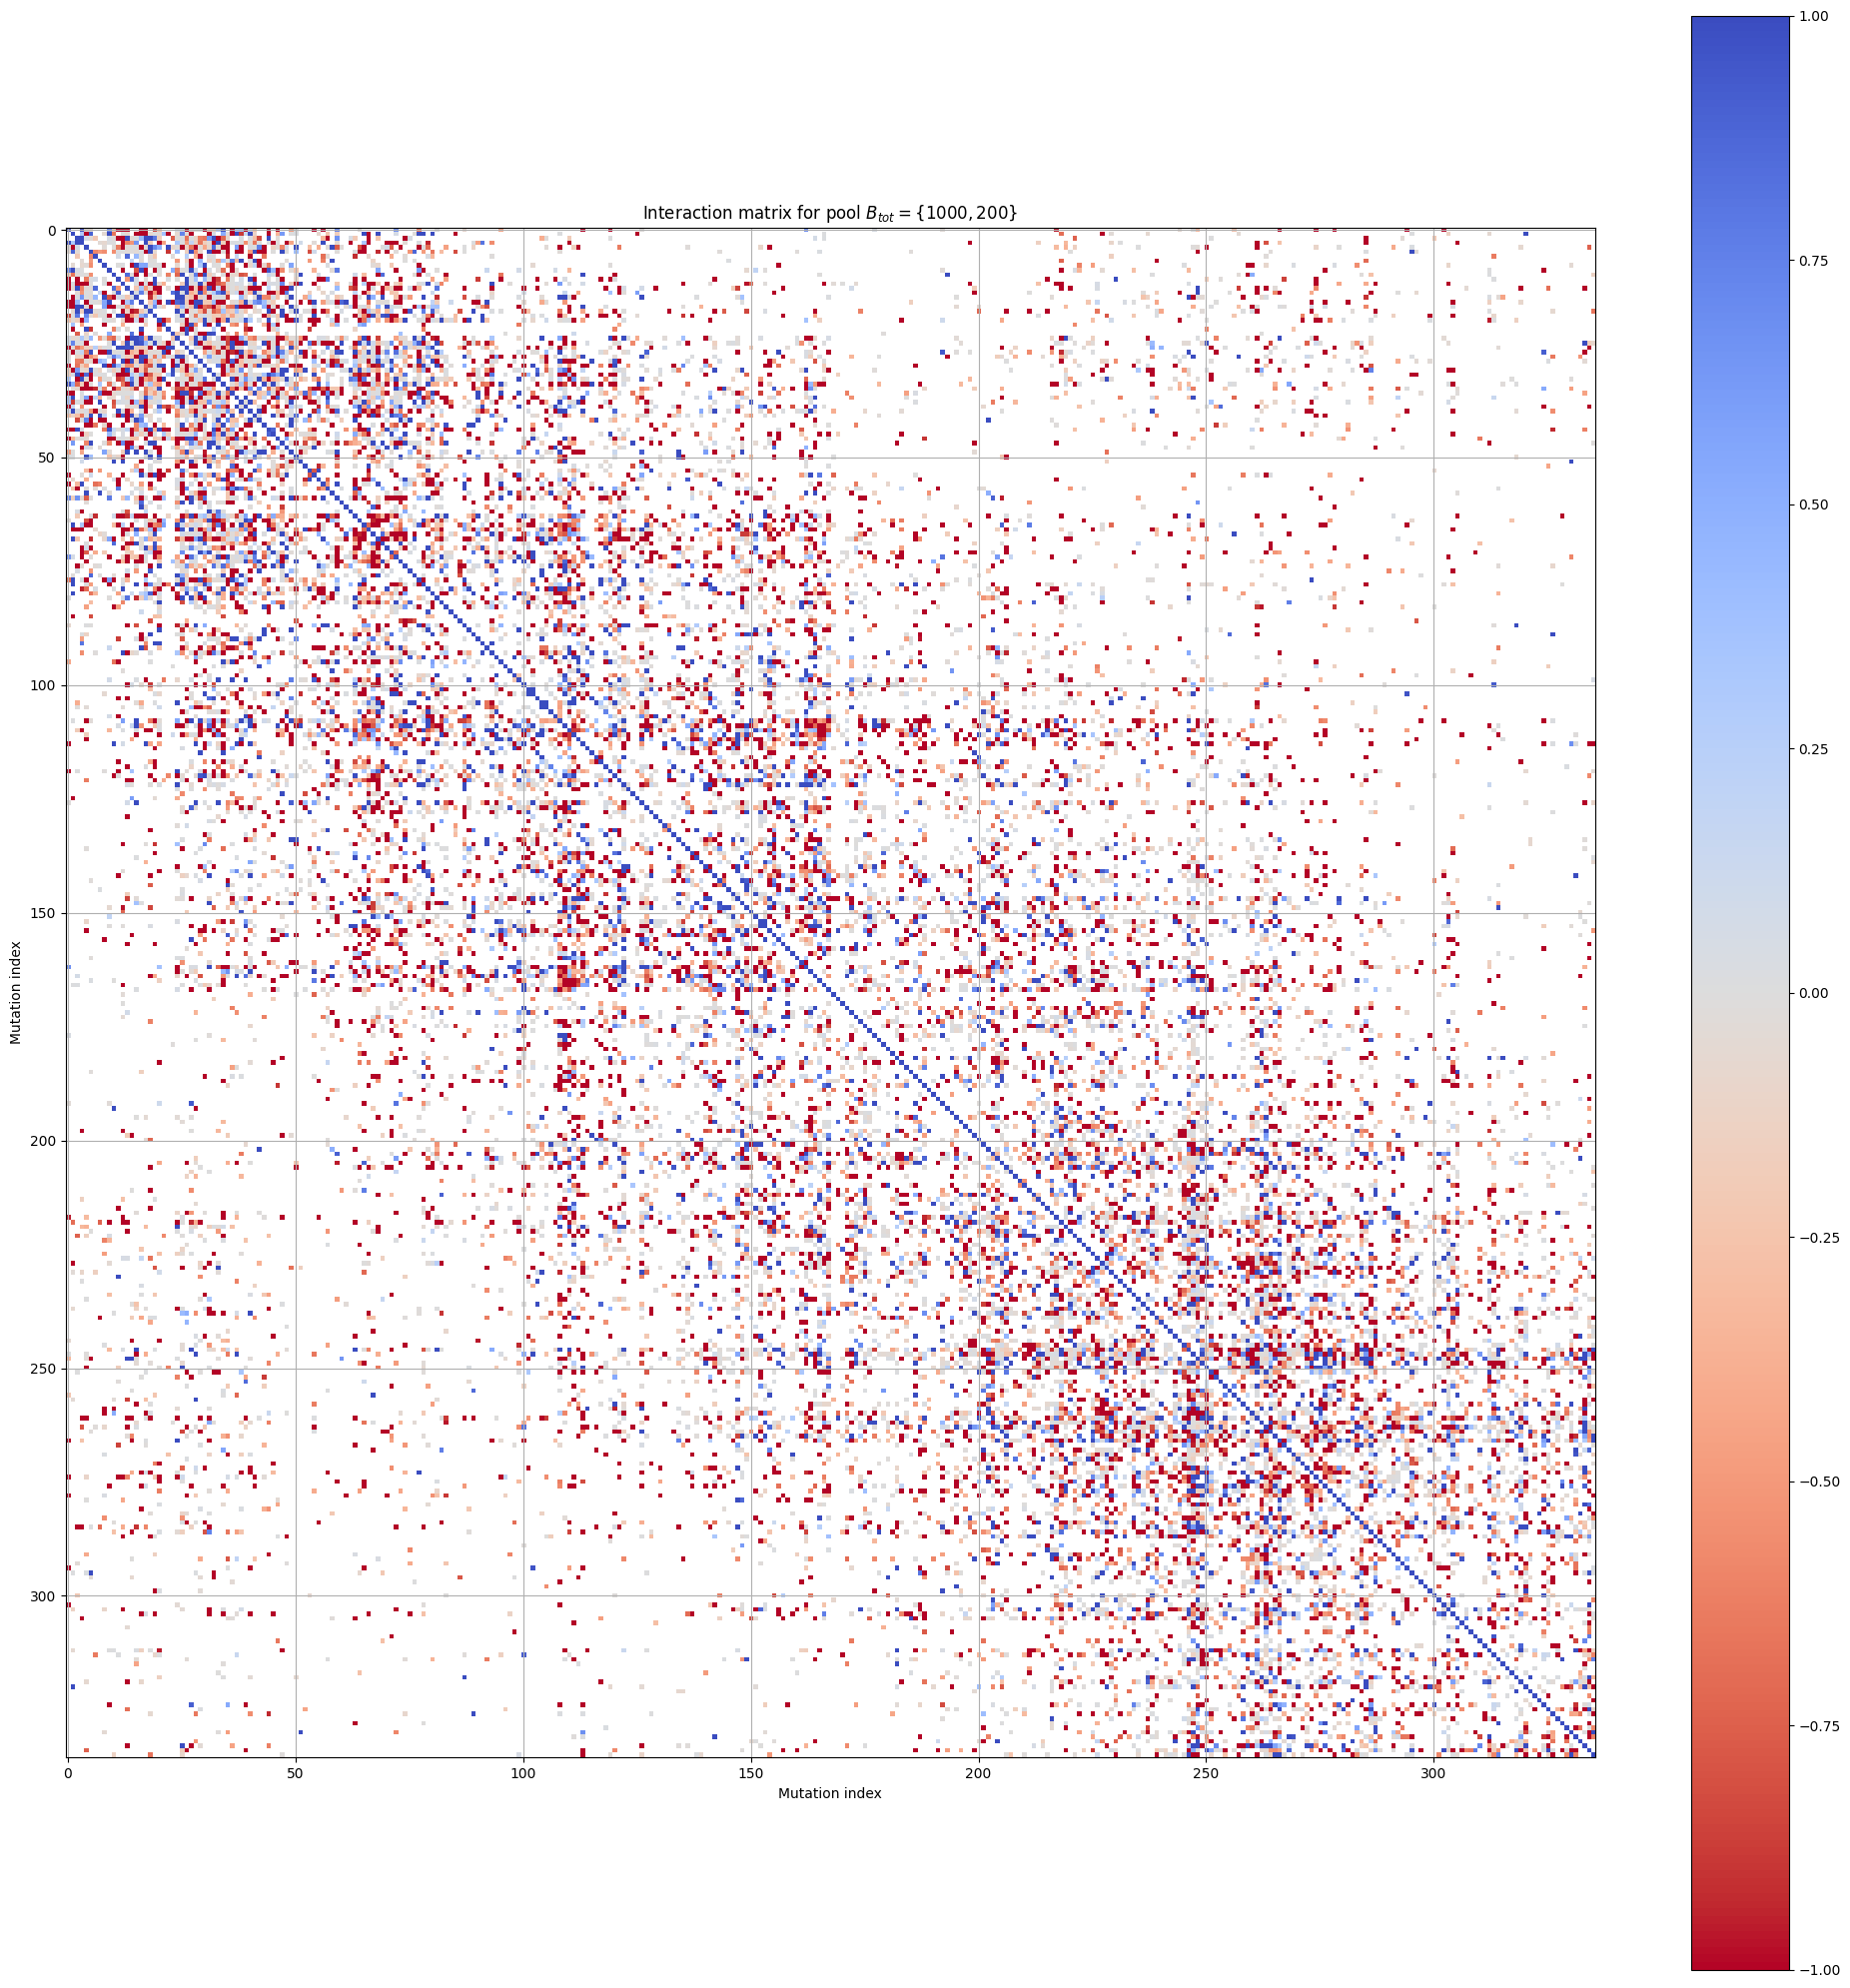

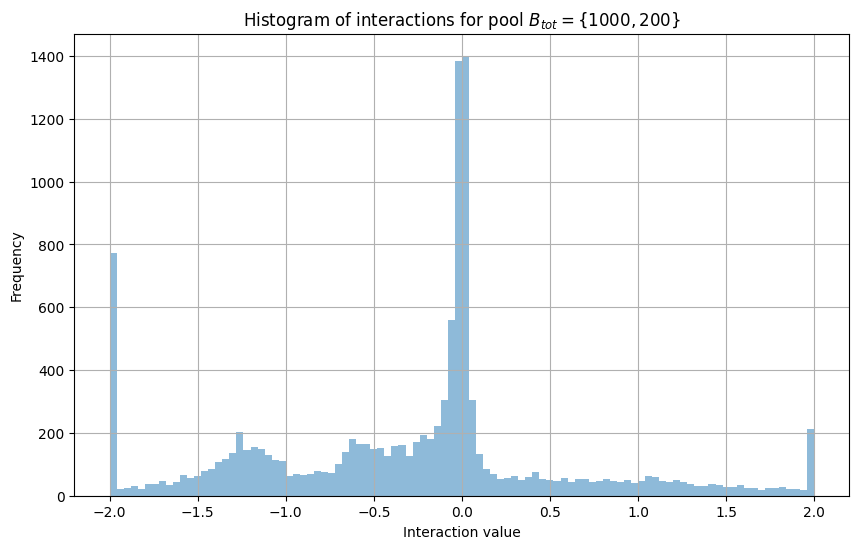

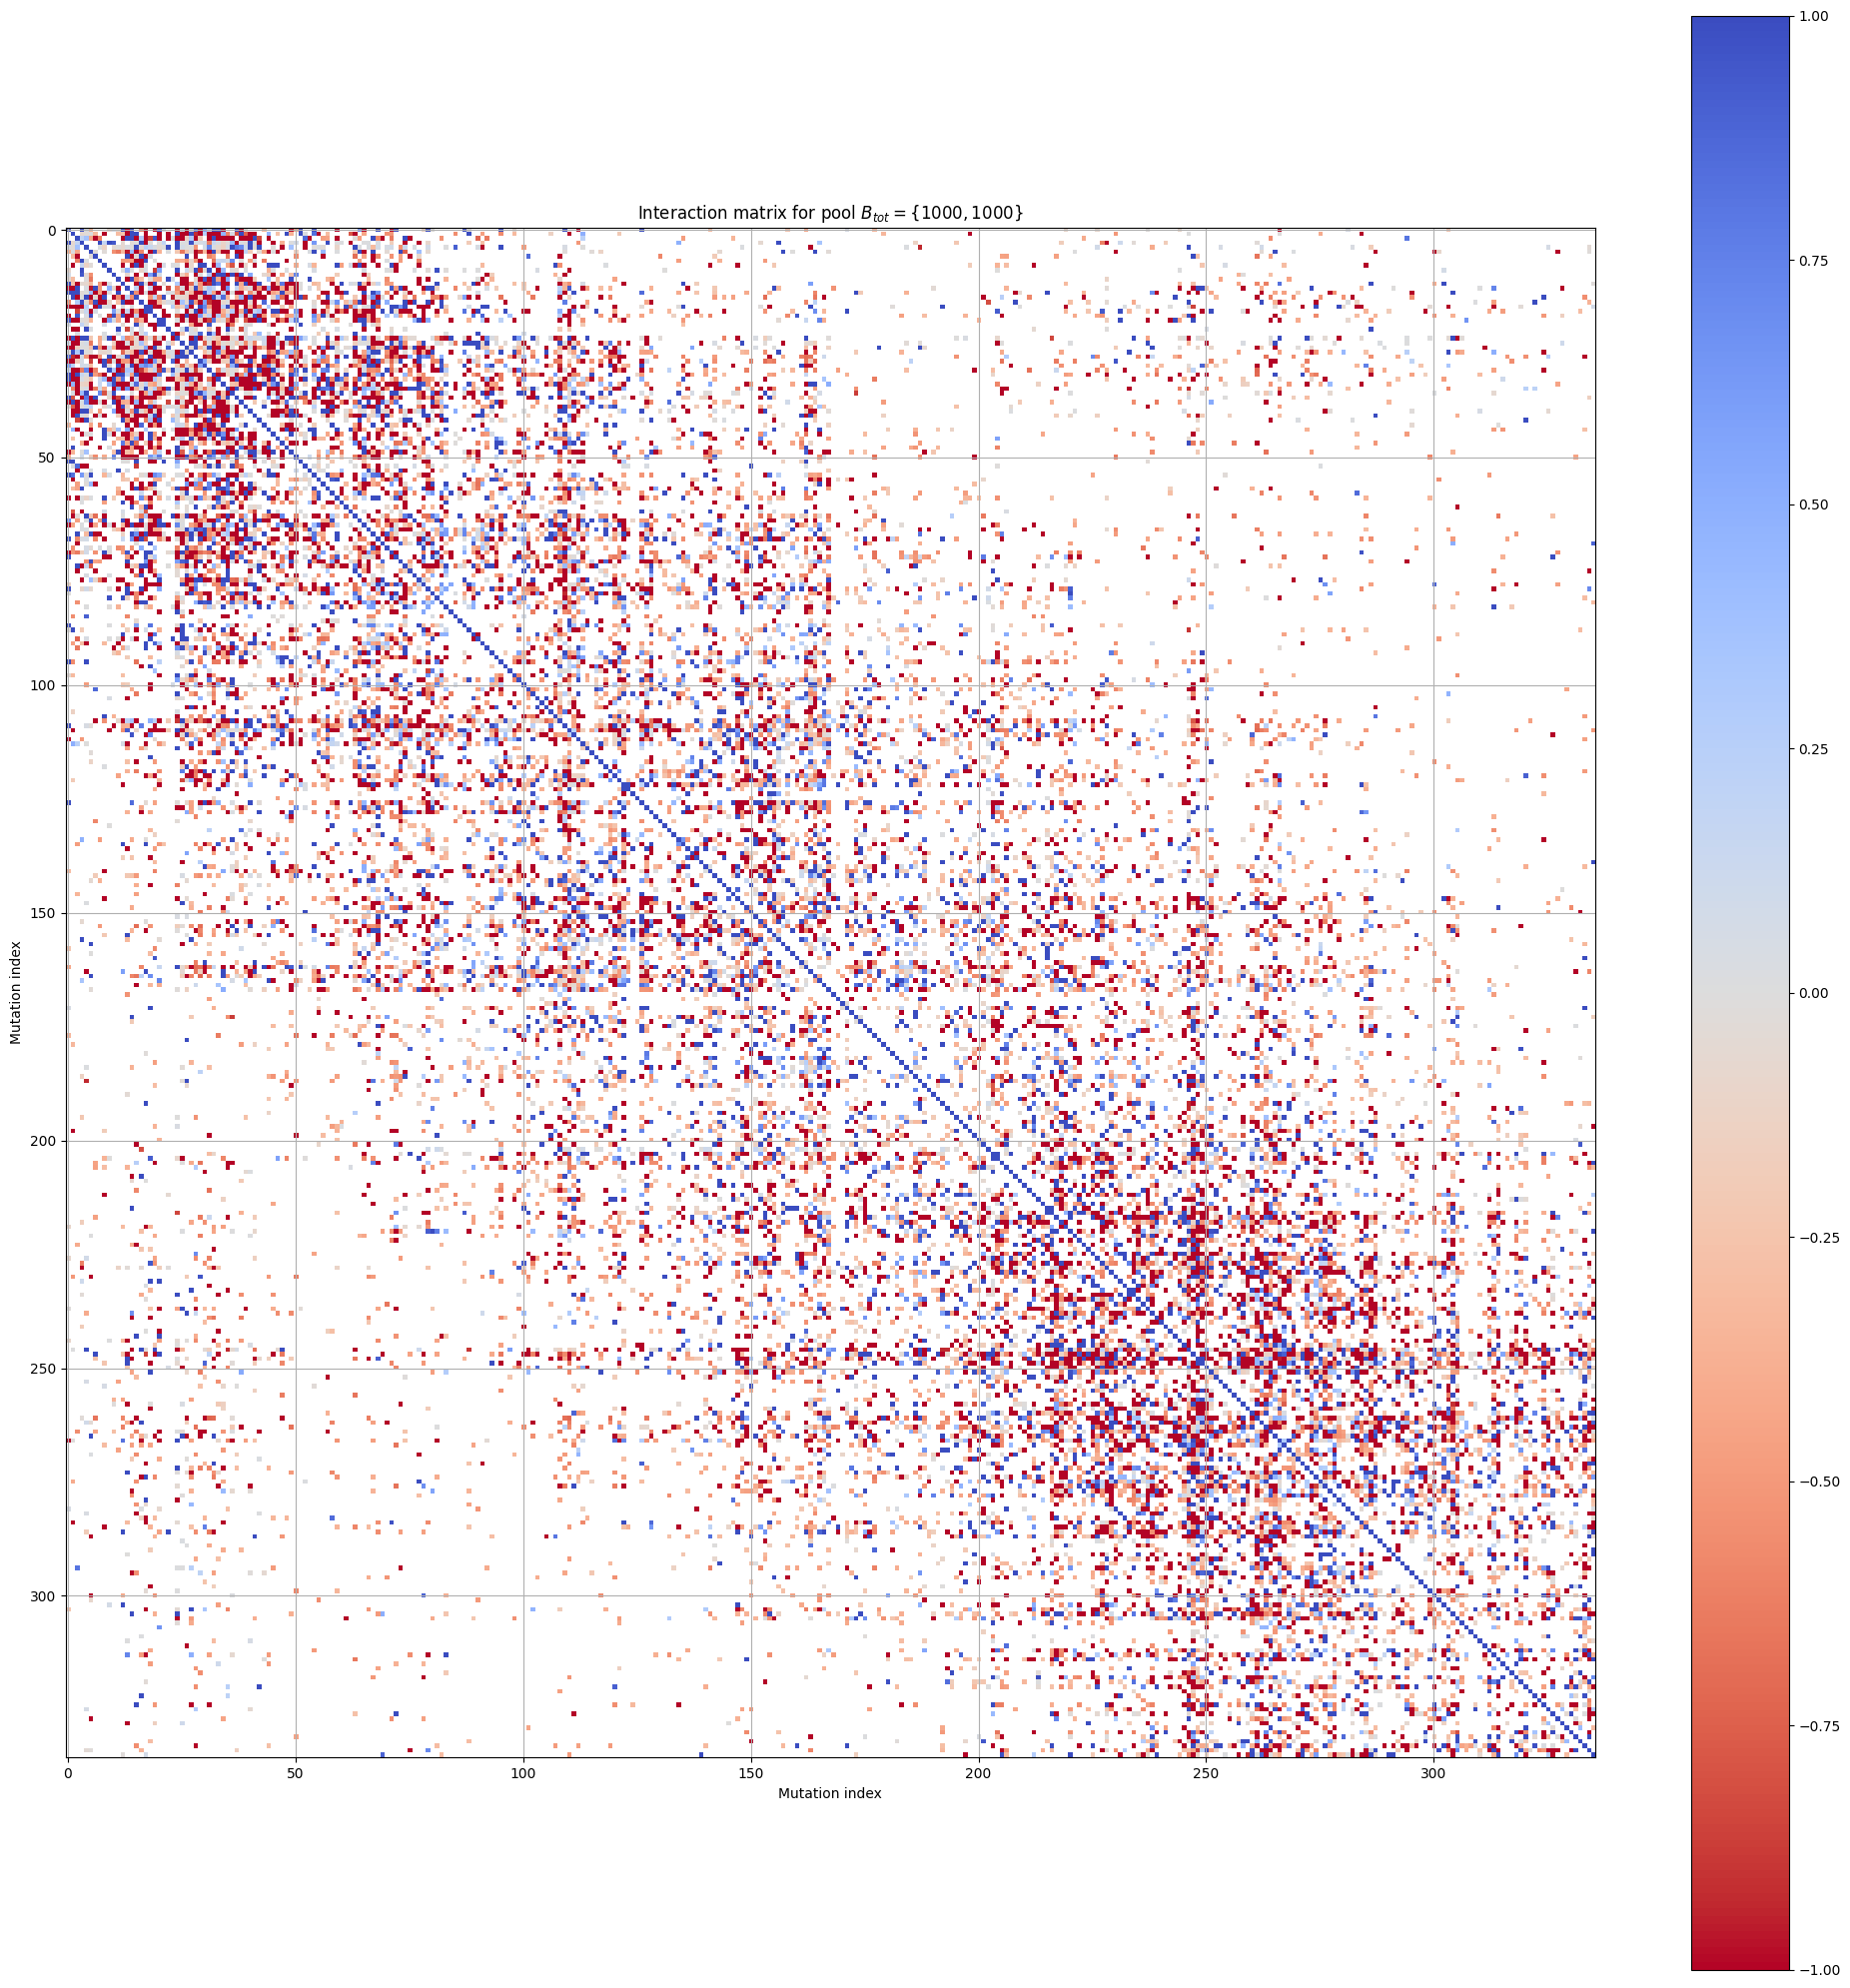

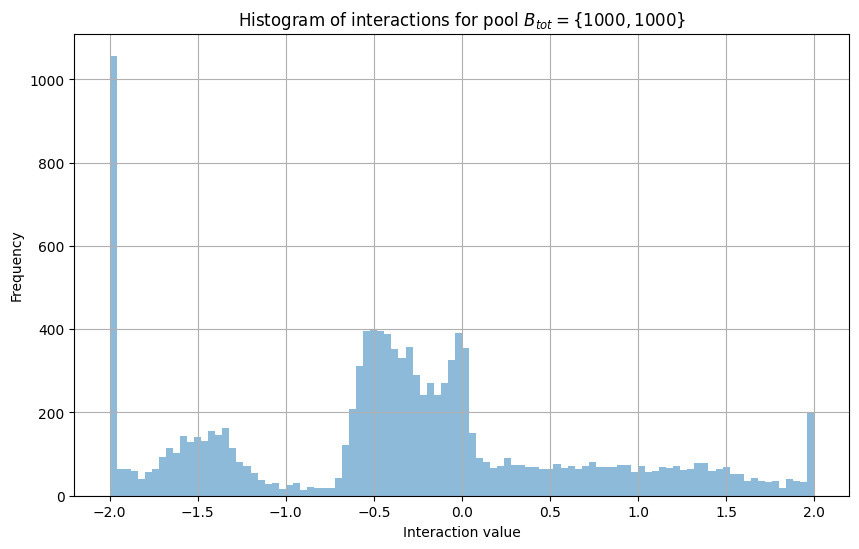

In [24]:
# plot interaction matrices for each pool
for i, pool in enumerate(interactions_r2):
    plt.figure(figsize=(20, 20))
    plt.imshow(pool, cmap='coolwarm_r', interpolation='nearest', clim=(-1, 1))
    plt.title(f'Interaction matrix for pool {legend[i]}')
    plt.colorbar()
    plt.xlabel('Mutation index')
    plt.ylabel('Mutation index')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # plot histogram of the interactions
    plt.figure(figsize=(10, 6))
    # interactions are flattened upper triangular matrix
    interactions_r2_flat = np.zeros(int(pool.shape[0] * (pool.shape[0] - 1) / 2))
    k = 0
    for j in range(pool.shape[0]):
        for l in range(j + 1, pool.shape[0]):
            interactions_r2_flat[k] = pool[j, l]
            k += 1
    # remove nans
    interactions_r2_flat = interactions_r2_flat[~np.isnan(interactions_r2_flat)]
    plt.hist(interactions_r2_flat, bins=100, alpha=0.5)
    plt.title(f'Histogram of interactions for pool {legend[i]}')
    plt.xlabel('Interaction value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()